# ChrAcc Peak and Regulatory Region Calling 

## Call Accessibility Peaks

Using the genrich computational tool, we will call chromatin accessibility peaks (ChrAcc peaks) for the GM12878inGM12878 ATAC-STARR data. These peaks will be analyzed against the buenrostro dataset and will serve as input into the second part of this notebook where we call active and silent regulatory regions. 

There are two options for calling peaks: 

1. Merging replicate bam files and using this one file for peak calling. This will yield fewer peaks because there statistical power is much lower. However, likely, an extremely significant q-value cut-off would not need to be applied. 

2. Using all three replicate DNA files as separate replicates. This will yield a much greater number of peaks because the "replicates" are really sampling the same plasmid library and would be more like technical replicates than biological. In this way, we might need to apply a really low q-value cutoff. 

I will try both of these approaches. 

### Use three replicates without merging

In [1]:
#Variables:
INPUT_DIR='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates'
OUTPUT_DIR='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/ChrAcc_peaks'

Genrich -t ${INPUT_DIR}/GM12878inGM12878_DNA_Rep1.unique.n-sorted.bam,${INPUT_DIR}/GM12878inGM12878_DNA_Rep2.unique.n-sorted.bam,${INPUT_DIR}/GM12878inGM12878_DNA_Rep3.unique.n-sorted.bam \
    -o ${OUTPUT_DIR}/GM12878inGM12878_DNA_genrich_3-replicates.narrowPeak -j -v

Processing experimental file #0: /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates/GM12878inGM12878_DNA_Rep1.unique.n-sorted.bam
  BAM records analyzed:   45252363
    Paired alignments:    45252363
      "orphan" alns:           173
    Unpaired alignments:         0
  Fragments analyzed:     22626095
    Full fragments:       22626095
    ATAC-seq cut sites:   45252190
      (expanded to length 100bp)
- control file #0 not provided -
  Background pileup value: 1.325799
Processing experimental file #1: /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates/GM12878inGM12878_DNA_Rep2.unique.n-sorted.bam
  BAM records analyzed:   40031374
    Paired alignments:    40031374
      "orphan" alns:           118
    Unpaired alignments:         0
  Fragments analyzed:     20015628
    Full fragments:       20015628
    ATAC-seq cut sites:   40031256
      (expanded to length 100bp)
- control file #1 not provided -
  Background pileup value:

In [2]:
OUTPUT_DIR='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/ChrAcc_peaks'

#Filter peaks by various filters and count number of regions. Column 9 corresponds to the -log10(qvalue).

#q=<0.1
awk '$9 > 1' ${OUTPUT_DIR}/GM12878inGM12878_DNA_genrich_3-replicates.narrowPeak | wc -l

#q=<0.01
awk '$9 > 2' ${OUTPUT_DIR}/GM12878inGM12878_DNA_genrich_3-replicates.narrowPeak | wc -l

#q=<0.001
awk '$9 > 3' ${OUTPUT_DIR}/GM12878inGM12878_DNA_genrich_3-replicates.narrowPeak | wc -l

#q=<0.0001
awk '$9 > 4' ${OUTPUT_DIR}/GM12878inGM12878_DNA_genrich_3-replicates.narrowPeak | wc -l

#q=<0.00001
awk '$9 > 5' ${OUTPUT_DIR}/GM12878inGM12878_DNA_genrich_3-replicates.narrowPeak | wc -l

#q=<10^-6
awk '$9 > 6' ${OUTPUT_DIR}/GM12878inGM12878_DNA_genrich_3-replicates.narrowPeak | wc -l

174085
162877
124612
101904
85668
72924


The q-value filter of 10^-6 is the closest to the number I achieved previously with two replicates. I am thinking the merged replicate strategy may be the best way forward. 

### Merge replicates and call peaks

In [4]:
module restore tools

#Variables:
INPUT_DIR='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams'

samtools merge -@ 12 -f -n  \
    ${INPUT_DIR}/individual_replicates/GM12878inGM12878_DNA_Rep1.unique.n-sorted.bam \
    ${INPUT_DIR}/individual_replicates/GM12878inGM12878_DNA_Rep2.unique.n-sorted.bam \
    ${INPUT_DIR}/individual_replicates/GM12878inGM12878_DNA_Rep3.unique.n-sorted.bam

Restoring modules from user's tools


In [5]:
#Variables:
INPUT_DIR='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams'
OUTPUT_DIR='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/ChrAcc_peaks'

Genrich -t ${INPUT_DIR}/merged_replicates/GM12878inGM12878_DNA_merged-3reps.unique.n-sorted.bam \
    -o ${OUTPUT_DIR}/GM12878inGM12878_DNA_genrich_merged-replicates.narrowPeak -j -v

Processing experimental file #0: /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/merged_replicates/GM12878inGM12878_DNA_merged-3reps.unique.n-sorted.bam
Warning! Read A00252:248:HNFJ3DSX2:3:1338:16523:4648 prevented from extending past 112505 on chrUn_KI270438v1
Warning! Read A00252:248:HNFJ3DSX2:3:1501:11722:9549 prevented from extending past 75005 on chr6_KI270802v1_alt
Warning! Read A00252:248:HNFJ3DSX2:3:2163:26964:12931 prevented from extending past 75005 on chr6_KI270802v1_alt
Warning! Read A00252:248:HNFJ3DSX2:4:1162:24216:33912 prevented from extending past 112505 on chrUn_KI270438v1
Warning! Read A00252:248:HNFJ3DSX2:4:1309:20627:3396 prevented from extending past 112505 on chrUn_KI270438v1
Warning! Read A00252:248:HNFJ3DSX2:4:1627:19849:3552 prevented from extending past 392061 on chrUn_KI270442v1
Warning! Read A00252:248:HNFJ3DSX2:4:2334:16080:3881 prevented from extending past 75005 on chr6_KI270802v1_alt
Warning! Read A00252:248:HNFJ3DSX2:4:2647:5068:36354 prevent

In [6]:
OUTPUT_DIR='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/ChrAcc_peaks'

#Filter peaks by various filters and count number of regions. Column 9 corresponds to the -log10(qvalue).

#q=<0.05
awk '$9 >=1.301' ${OUTPUT_DIR}/GM12878inGM12878_DNA_genrich_merged-replicates.narrowPeak | wc -l

#q=<0.01
awk '$9 >=2' ${OUTPUT_DIR}/GM12878inGM12878_DNA_genrich_merged-replicates.narrowPeak | wc -l

#q=<0.0001
awk '$9 >=4' ${OUTPUT_DIR}/GM12878inGM12878_DNA_genrich_merged-replicates.narrowPeak | wc -l


77326
63597
24286


In [1]:
#compare the two scenarios by looking at qvalue density plots. 
#read into R first
library(readr)
library(ggplot2)

merge <- read_tsv("/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/ChrAcc_peaks/GM12878inGM12878_DNA_genrich_merged-replicates.narrowPeak", 
                 col_names = FALSE)

three <- read_tsv("/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/ChrAcc_peaks/GM12878inGM12878_DNA_genrich_3-replicates.narrowPeak", 
                 col_names = FALSE)


── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_character(),
  X5 = col_double(),
  X6 = col_character(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double(),
  X10 = col_double()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_character(),
  X5 = col_double(),
  X6 = col_character(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double(),
  X10 = col_double()
)




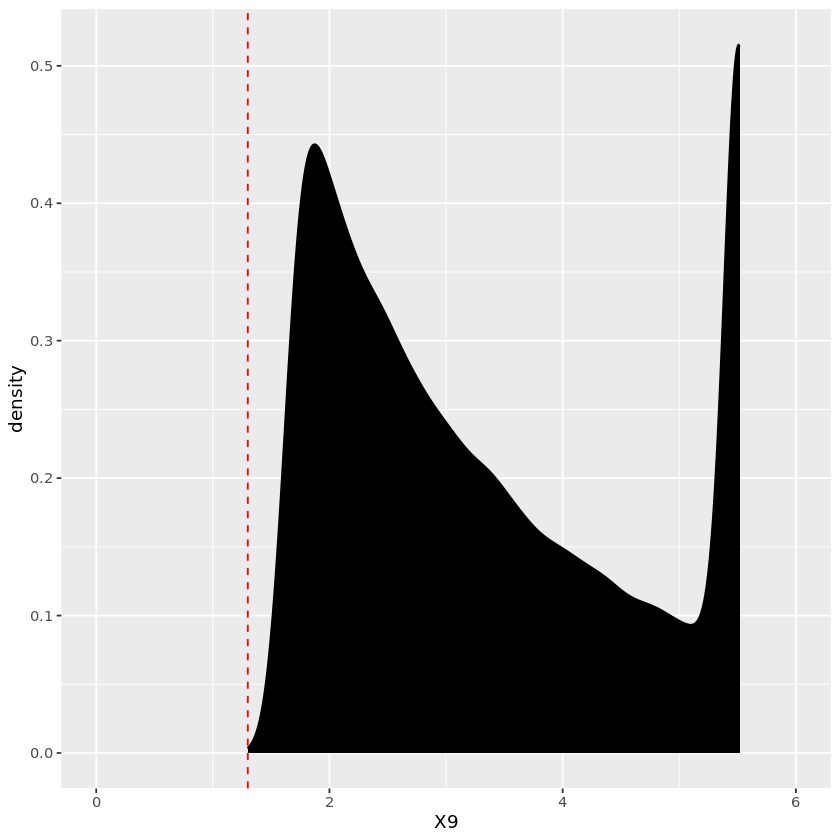

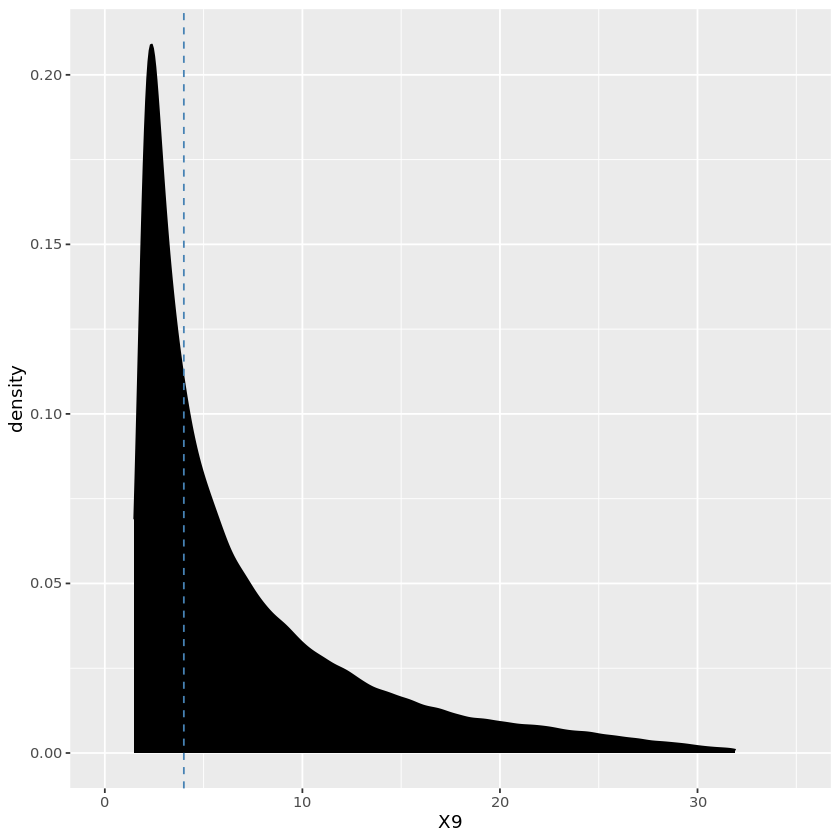

In [4]:
ggplot(merge, aes(x=X9)) +
    geom_density(fill="black") +
    geom_vline(xintercept = 1.3, linetype = "dashed", color = "red") +
    coord_cartesian(xlim = c(0, 6))

ggplot(three, aes(x=X9)) +
    geom_density(fill="black") +
    geom_vline(xintercept = 4, linetype = "dashed", color = "steelblue") +
    coord_cartesian(xlim = c(0, 35))

### Summary

When three replicates are used separately, we get an additional ~40,000 chrAcc peaks when compared to 2 replicates. (101,904 with 3 reps, ~70,000 with 2 reps at q<0.0001). Furthermore, when we use three merged replicates, with a q<0.05, we get 77,326 peaks. 

Given this result, we have two ways to proceed in my opinion. First, we use the peakset with 101,904 peaks which used the same qvalue cutoff as before but with three independent replicates. Alternatively, we use the 77,326 peakset which used a file of merged bams. For this paper, I think the most appropriate way forward is to use the former. 

In the case of the cross-species paper, we want to be stringent and therefore the latter approach may be better. 

In [2]:
#write a filtered peakset. 

OUTPUT_DIR='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/ChrAcc_peaks'

#q=<0.0001
awk '$9 >4' ${OUTPUT_DIR}/GM12878inGM12878_DNA_genrich_3-replicates.narrowPeak > \
    ${OUTPUT_DIR}/GM12878inGM12878_DNA_genrich_3-replicates_0.0001-qvalue.narrowPeak

In [3]:
#quick check to compare ours and buenrostro:
bedtools jaccard -a ${OUTPUT_DIR}/GM12878inGM12878_DNA_genrich_3-replicates_0.0001-qvalue.narrowPeak \
    -b /data/hodges_lab/public_data/GM12878/obtained_as_raw_files/ATAC_GM12878_2013-buenrostro/data/genrich_peaks/GM12878_ATAC-seq_buenrostro_genrich_0.0001-qvalue.narrowPeak 

intersection	union	jaccard	n_intersections
38454012	80486872	0.477767	62443


## Call Regulatory Regions

Using a python script I wrote, I will now call regulatory regions using the 3-replicates_0.0001-qvalue peakset and all three replicate bam files. 

In [6]:
%%bash
PEAKS='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/ChrAcc_peaks/GM12878inGM12878_DNA_genrich_3-replicates_0.0001-qvalue.narrowPeak'
BAMS='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates'
OUT_DIR='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_no-counts'

#setup
#mkdir /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_no-counts
#source activate /home/hansetj1/.conda/envs/jupyter
cd /data/hodges_lab/ATAC-STARR_B-cells/bin/activity_analysis/call_active_peaks

#Try again, but with setting FDR at 0.1:
#GG_3-replicates_0.1 q-value
python3 call_ATAC-STARR_regulatory-regions.py -i $PEAKS -o $OUT_DIR -q 0.1 \
    -d ${BAMS}/GM12878inGM12878_DNA_Rep1.filtered.n-sorted.bam ${BAMS}/GM12878inGM12878_DNA_Rep2.filtered.n-sorted.bam ${BAMS}/GM12878inGM12878_DNA_Rep3.filtered.n-sorted.bam \
    -r ${BAMS}/GM12878inGM12878_RNA_Rep1.filtered.n-sorted.bam ${BAMS}/GM12878inGM12878_RNA_Rep2.filtered.n-sorted.bam ${BAMS}/GM12878inGM12878_RNA_Rep3.filtered.n-sorted.bam

PARAMETERS:
ChrAcc Peaks File: /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/ChrAcc_peaks/GM12878inGM12878_DNA_genrich_3-replicates_0.0001-qvalue.narrowPeak
DNA Files: /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates/GM12878inGM12878_DNA_Rep1.filtered.n-sorted.bam /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates/GM12878inGM12878_DNA_Rep2.filtered.n-sorted.bam /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates/GM12878inGM12878_DNA_Rep3.filtered.n-sorted.bam
RNA Files: /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates/GM12878inGM12878_RNA_Rep1.filtered.n-sorted.bam /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates/GM12878inGM12878_RNA_Rep2.filtered.n-sorted.bam /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates/GM12878inGM12878_RNA_Rep3.filtered.n-sorted.bam
Output Directory: /data/hodges_lab/ATAC-STARR_B-cells


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v2.0.1

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 6 BAM files                                      ||
||                           o GM12878inGM12878_DNA_Rep1.filtered.n-sorte ... ||
||                           o GM12878inGM12878_DNA_Rep2.filtered.n-sorte ... ||
||                           o GM12878inGM12878_DNA_Rep3.filtered.n-sorte ... ||
||                           o GM12878inGM12878_RNA_Rep1.filtered

In [7]:
%%bash
#How many active and silent regions do we have?
OUT_DIR='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_no-counts/'

wc -l ${OUT_DIR}/active_regions.bed
wc -l ${OUT_DIR}/silent_regions.bed

30078 /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_no-counts//active_regions.bed
21125 /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_no-counts//silent_regions.bed


### Volcano Plot 

In [2]:
#setup
library(tidyverse)
library(DESeq2)

In [8]:
load("/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_no-counts/res.Rdata")

Warning message:
“Removed 1277132 rows containing non-finite values (stat_bin2d).”


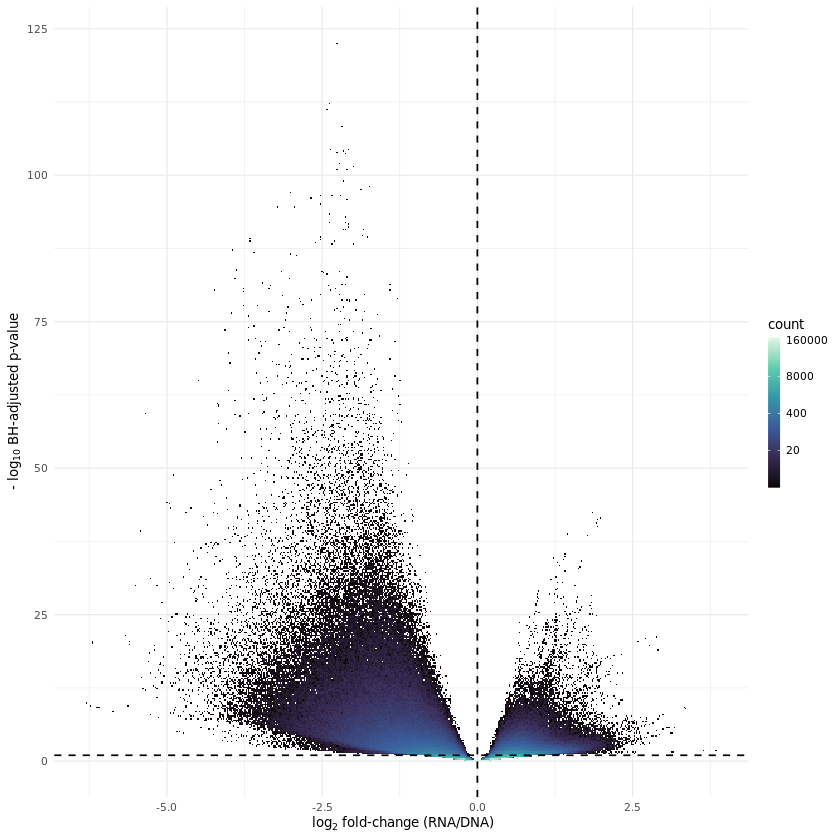

In [5]:
res_df <- as.data.frame(res) %>% rownames_to_column(var = "Bin_ID")

volcano <- ggplot(res_df) +
  geom_bin2d(aes(x=log2FoldChange, y=-log10(padj)), bins = 500) +
  scale_fill_viridis_c(trans = "log", breaks = c(0, 20, 400, 8000, 160000), option = "mako") +
  geom_hline(yintercept = c(-log10(0.1)), linetype = "dashed") +
  geom_vline(xintercept = c(0), linetype = "dashed") +
  xlab(bquote(~log[2]~"fold-change (RNA/DNA)")) +
  ylab(bquote("-"~log[10]~"BH-adjusted p-value")) +
  theme_minimal(base_size = 8, base_family = "Arial") +
  theme(legend.position = "right", legend.key.height = unit(0.25, units = "in"), legend.key.width = unit(0.1, units = "in"), axis.title = element_text(face = "bold"))# +
 #coord_cartesian(xlim = c(-5,5), ylim = c(0,100))

volcano

### MA plots

In [9]:
load("/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_no-counts/dds.Rdata")

In [10]:
#extract normalized counts
cts_df <- counts(dds, normalized=TRUE) %>% as.data.frame() %>% rownames_to_column(var = "Bin_ID")

#join all bins with their counts. 
bins_df <- inner_join(res_df, cts_df, by = "Bin_ID")

head(bins_df)

,Bin_ID,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,DNA1,DNA2,DNA3,RNA1,RNA2,RNA3
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,bin_1,8.334317,-0.08400819,0.9591246,-0.0875884,0.9302038,NA,10.85649,6.623169,8.402344,0.7639394,22.57296,0.7870009
2,bin_2,10.118357,-0.20084498,0.8377193,-0.2397521,0.8105224,NA,12.21356,9.934753,10.502930,0.7639394,22.57296,4.7220057
3,bin_3,15.780312,-0.12947496,0.6379917,-0.2029415,0.8391808,NA,16.28474,16.557922,16.804688,14.5148493,25.79766,4.7220057
4,bin_4,21.168725,-0.33217391,0.5825897,-0.5701679,0.5685638,0.8244999,23.07005,21.525298,26.257325,22.9181831,27.73249,5.5090066
5,bin_5,25.839542,-0.30034328,0.5347798,-0.5616205,0.5743746,0.8276766,24.42711,26.492675,34.659670,25.9739409,34.82685,8.6570104
6,bin_6,28.434927,-0.24945276,0.4665874,-0.5346325,0.5929040,0.8376757,27.14124,26.492675,38.860842,25.9739409,34.82685,17.3140208


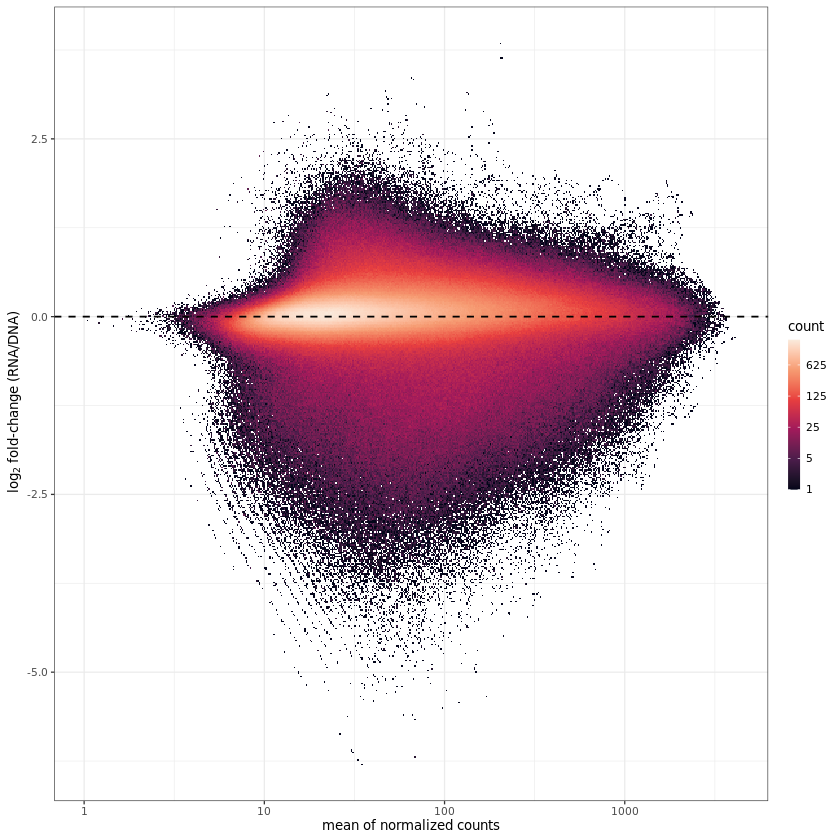

In [8]:
#reproduce ggplot version of MA plot: 
#make mean normalized counts column:

bins_df$mean_counts <- rowMeans(bins_df[ , c(7,8,9,10,11,12)], na.rm=TRUE)

MA_plot <- ggplot(bins_df) +
  geom_bin2d(aes(y=log2FoldChange, x=mean_counts), bins = 500) +
  scale_x_continuous(trans='log10') +
  scale_fill_viridis_c(trans = "log", breaks = c(1, 5, 25, 125, 625, 3125), option = "rocket") +
  geom_hline(yintercept = c(0), linetype = "dashed") +
  ylab(bquote(~log[2]~"fold-change (RNA/DNA)")) +
  xlab("mean of normalized counts") +
  theme_bw(base_size = 8, base_family = "Arial") +
  theme(legend.position = "right", legend.key.height = unit(0.25, units = "in"), legend.key.width = unit(0.1, units = "in"))# +
 #coord_cartesian(xlim = c(-5,5), ylim = c(0,100))

MA_plot

### MA pvalue plot

Warning message:
“Removed 1277132 rows containing non-finite values (stat_bin2d).”


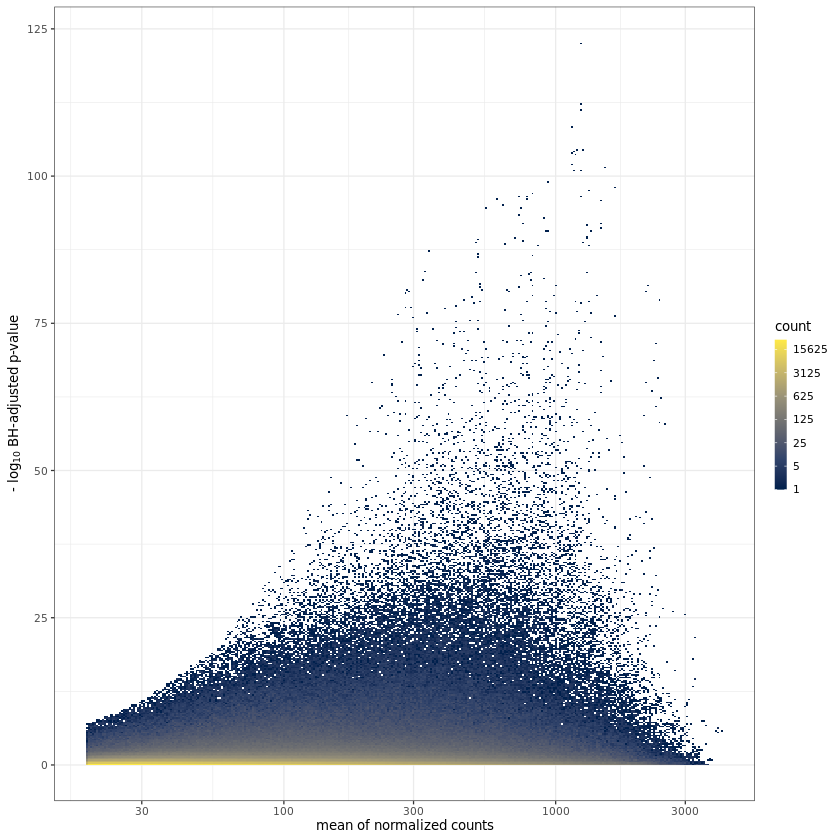

In [15]:
MAp_plot <- ggplot(bins_df) +
  geom_bin2d(aes(y=-log10(padj), x=mean_counts), bins = 500) +
  scale_fill_viridis_c(trans = "log", breaks = c(1, 5, 25, 125, 625, 3125, 15625), option = "cividis") +
  ylab(bquote("-"~log[10]~"BH-adjusted p-value")) +
  xlab("mean of normalized counts") +
  theme_bw(base_size = 8, base_family = "Arial") +
  theme(legend.position = "right", legend.key.height = unit(0.25, units = "in"), legend.key.width = unit(0.1, units = "in")) +
  #coord_cartesian(xlim = c(0,4000)) +
  scale_x_continuous(trans='log10')

MAp_plot

### pvalue distribution

Warning message:
“Removed 1939 rows containing non-finite values (stat_density).”
Warning message:
“Removed 1277132 rows containing non-finite values (stat_density).”


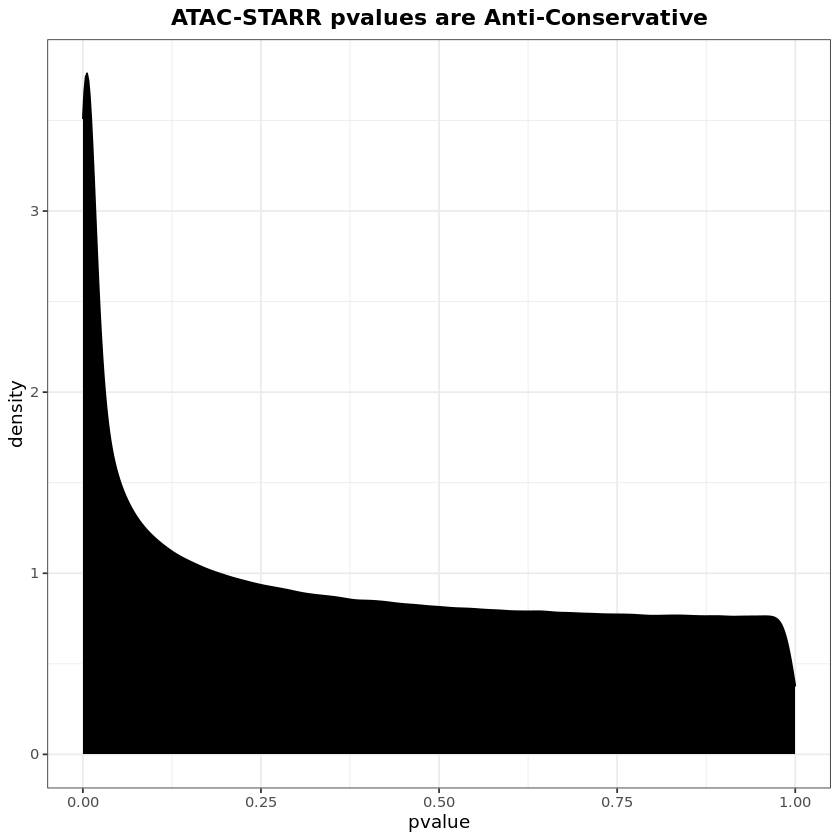

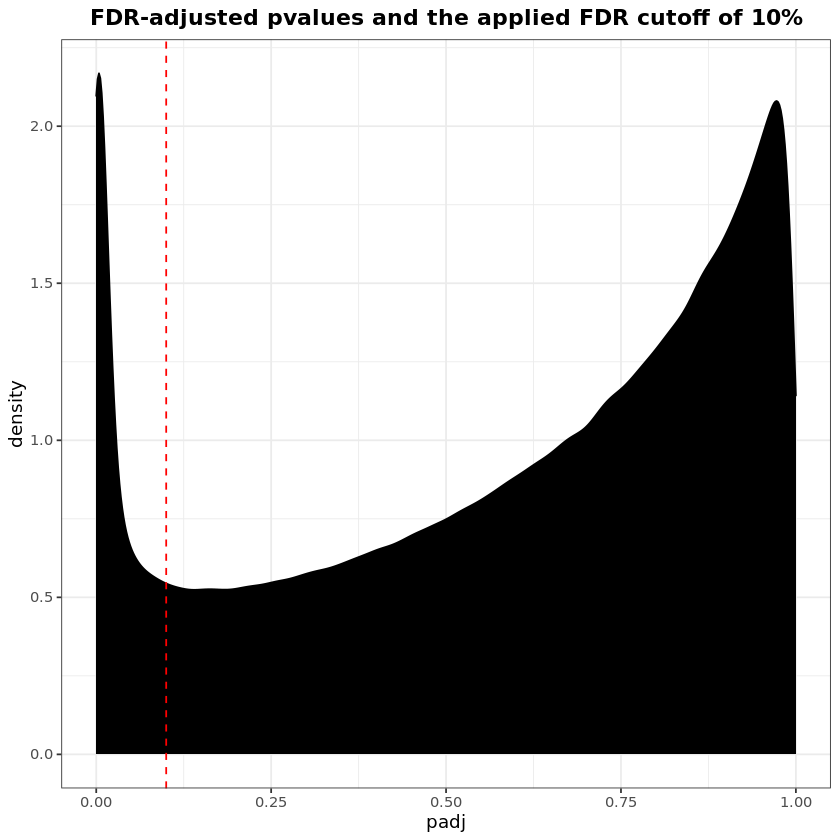

In [16]:
# lets look at pval and padj distribution: 
ggplot(bins_df, aes(x=pvalue)) +
    geom_density(fill="black") +
    ggtitle("ATAC-STARR pvalues are Anti-Conservative") +
    theme_bw() +
    theme(plot.title = element_text(hjust = 0.5, face = "bold"))
    
ggplot(bins_df, aes(x=padj)) +
    geom_density(fill="black") +
    geom_vline(xintercept = 0.1, linetype = "dashed", color = "red") +
    ggtitle("FDR-adjusted pvalues and the applied FDR cutoff of 10%") +
    theme_bw() +
    theme(plot.title = element_text(hjust = 0.5, face = "bold"))
    #coord_cartesian(xlim = c(0, 6))

### investigate NA values

We always see the following warnings with this table: 

Warning message:
“Removed 1939 rows containing non-finite values (stat_density).”
Warning message:
“Removed 1277132 rows containing non-finite values (stat_density).”

Investigate further. 

In [17]:
#how many NAs are there in pvalue?
nrow(filter(bins_df, is.na(pvalue)))
nrow(filter(bins_df, !is.na(pvalue)))

#how many NAs are there in padj?
nrow(filter(bins_df, is.na(padj)))
nrow(filter(bins_df, !is.na(padj)))

[1] 1939

[1] 5977719

[1] 1277132

[1] 4702526

It looks like we have 1939 pvalues that are NA. Further, it looks like we have 1277132 padj values that are NA. When padj is NA while pval is not, the reason is due to the row being filtered by automatic independent filtering, for having a low mean normalized count. Could this could be a result of the shrinkage algorithm applied? It looks like the analysis later in this notebook says no. 

In [19]:
#First see if this conclusion is true. It looks like it is based on the readcount summaries. 
na_bins <- filter(bins_df, is.na(padj)) 
non_na_bins <- filter(bins_df, !is.na(padj))

summary(rowMeans(na_bins[ , c(7,8,9,10,11,12)], na.rm=TRUE))
summary(rowMeans(non_na_bins[ , c(7,8,9,10,11,12)], na.rm=TRUE))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.043  11.327  14.032  13.808  16.479 692.333 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.90   29.96   51.32  117.64  112.65 4096.96 

### region calling without LFC shrinkage 

In [5]:
%%bash
PEAKS='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/ChrAcc_peaks/GM12878inGM12878_DNA_genrich_3-replicates_0.0001-qvalue.narrowPeak'
BAMS='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates'
OUT_DIR='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_no-counts_no-shrink'

#setup
mkdir /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_no-counts_no-shrink
cd /data/hodges_lab/ATAC-STARR_B-cells/bin/activity_analysis/call_active_peaks

#Try again, but with setting FDR at 0.1:
#GG_3-replicates_0.1 q-value
python3 call_ATAC-STARR_regulatory-regions.py -i $PEAKS -o $OUT_DIR -q 0.1 \
    -d ${BAMS}/GM12878inGM12878_DNA_Rep1.filtered.n-sorted.bam ${BAMS}/GM12878inGM12878_DNA_Rep2.filtered.n-sorted.bam ${BAMS}/GM12878inGM12878_DNA_Rep3.filtered.n-sorted.bam \
    -r ${BAMS}/GM12878inGM12878_RNA_Rep1.filtered.n-sorted.bam ${BAMS}/GM12878inGM12878_RNA_Rep2.filtered.n-sorted.bam ${BAMS}/GM12878inGM12878_RNA_Rep3.filtered.n-sorted.bam

PARAMETERS:
ChrAcc Peaks File: /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/ChrAcc_peaks/GM12878inGM12878_DNA_genrich_3-replicates_0.0001-qvalue.narrowPeak
DNA Files: /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates/GM12878inGM12878_DNA_Rep1.filtered.n-sorted.bam /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates/GM12878inGM12878_DNA_Rep2.filtered.n-sorted.bam /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates/GM12878inGM12878_DNA_Rep3.filtered.n-sorted.bam
RNA Files: /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates/GM12878inGM12878_RNA_Rep1.filtered.n-sorted.bam /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates/GM12878inGM12878_RNA_Rep2.filtered.n-sorted.bam /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates/GM12878inGM12878_RNA_Rep3.filtered.n-sorted.bam
Output Directory: /data/hodges_lab/ATAC-STARR_B-cells

mkdir: cannot create directory ‘/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_no-counts_no-shrink’: File exists

        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v2.0.1

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 6 BAM files                                      ||
||                           o GM12878inGM12878_DNA_Rep1.filtered.n-sorte ... ||
||                           o GM12878inGM12878_DNA_Rep2.filte

In [6]:
%%bash
#How many active and silent regions do we have?
OUT_DIR='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_no-counts_no-shrink/'

wc -l ${OUT_DIR}/active_regions.bed
wc -l ${OUT_DIR}/s-ilent_regions.bed

30078 /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_no-counts_no-shrink//active_regions.bed
21125 /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_no-counts_no-shrink//silent_regions.bed


#### Volcano Plot 

In [1]:
#setup
library(tidyverse)
library(DESeq2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The follow

In [5]:
load("/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_no-counts_no-shrink/res.Rdata")

Warning message:
“Removed 1277132 rows containing non-finite values (stat_bin2d).”
Warning message:
“Removed 1277132 rows containing non-finite values (stat_bin2d).”


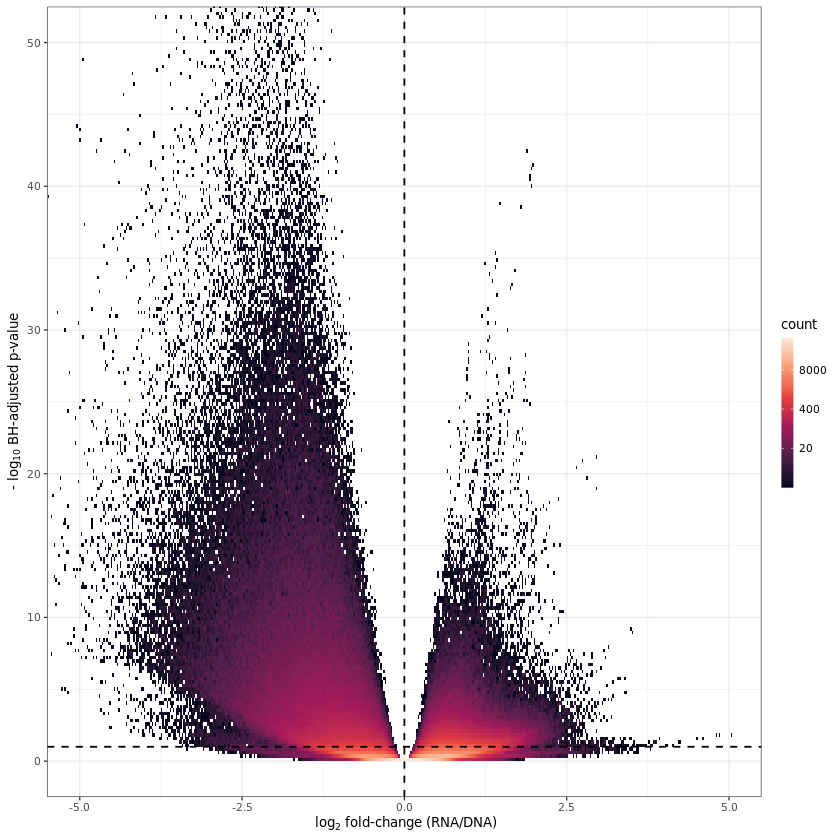

In [9]:
res_df <- as.data.frame(res) %>% rownames_to_column(var = "Bin_ID")

volcano <- ggplot(res_df) +
  geom_bin2d(aes(x=log2FoldChange, y=-log10(padj)), bins = 500) +
  scale_fill_viridis_c(trans = "log", breaks = c(0, 20, 400, 8000), option = "rocket") +
  geom_hline(yintercept = c(-log10(0.1)), linetype = "dashed") +
  geom_vline(xintercept = c(0), linetype = "dashed") +
  xlab(bquote(~log[2]~"fold-change (RNA/DNA)")) +
  ylab(bquote("-"~log[10]~"BH-adjusted p-value")) +
  theme_bw(base_size = 8, base_family = "Arial") +
  theme(legend.position = "right", legend.key.height = unit(0.25, units = "in"), legend.key.width = unit(0.1, units = "in"), axis.title = element_text(face = "bold")) +
  coord_cartesian(xlim = c(-5,5), ylim = c(0,50))

volcano

res_dir <- '/data/hodges_lab/ATAC-STARR_B-cells/results/NAR_paper_figures'
ggsave(volcano, filename = paste0(res_dir, "/volcano.pdf"), device = cairo_pdf, width = 3, height = 2)

#### MA plots: All, DNA only, RNA only

In [33]:
load("/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_no-counts/dds.Rdata")

In [34]:
#extract normalized counts
cts_df <- counts(dds, normalized=TRUE) %>% as.data.frame() %>% rownames_to_column(var = "Bin_ID")

#join all bins with their counts. 
bins_df <- inner_join(res_df, cts_df, by = "Bin_ID")

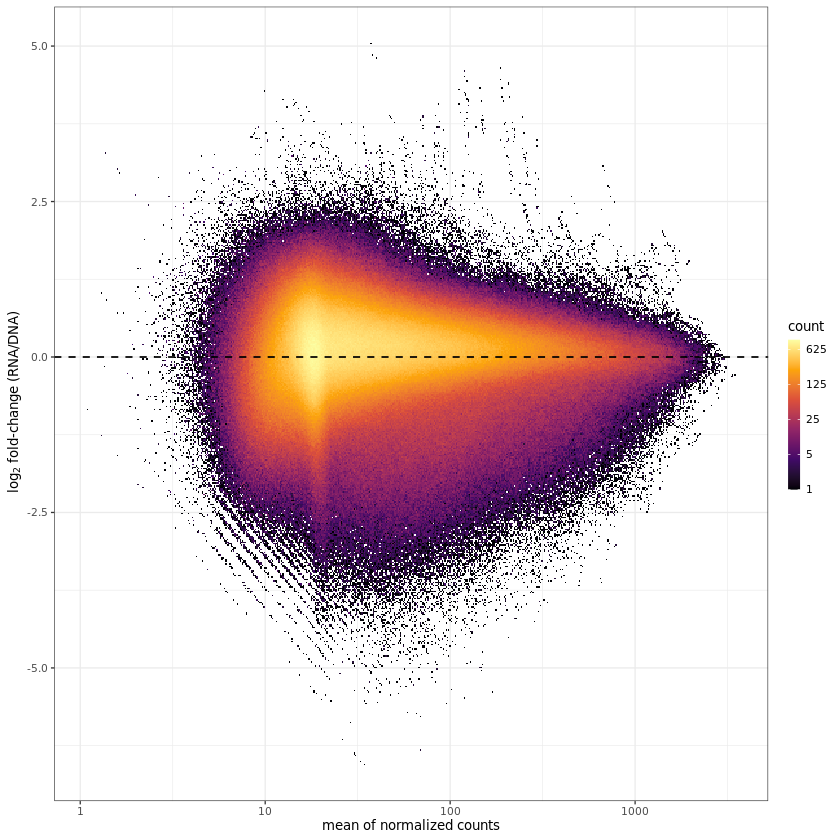

In [35]:
#reproduce ggplot version of MA plot: 
#make mean normalized counts column:

bins_df$mean_counts <- rowMeans(bins_df[ , c(7,8,9,10,11,12)], na.rm=TRUE)

MA_plot <- ggplot(bins_df) +
  geom_bin2d(aes(y=log2FoldChange, x=mean_counts), bins = 500) +
  scale_x_continuous(trans='log10') +
  scale_fill_viridis_c(trans = "log", breaks = c(1, 5, 25, 125, 625, 3125), option = "inferno") +
  geom_hline(yintercept = c(0), linetype = "dashed") +
  ylab(bquote(~log[2]~"fold-change (RNA/DNA)")) +
  xlab("mean of normalized counts") +
  theme_bw(base_size = 8, base_family = "Arial") +
  theme(legend.position = "right", legend.key.height = unit(0.25, units = "in"), legend.key.width = unit(0.1, units = "in"))# +
 #coord_cartesian(xlim = c(-5,5), ylim = c(0,100))

MA_plot

res_dir <- '/data/hodges_lab/ATAC-STARR_B-cells/results/NAR_paper_figures'
ggsave(MA_plot, filename = paste0(res_dir, "/MA-plot_all.pdf"), device = cairo_pdf, width = 3, height = 3)

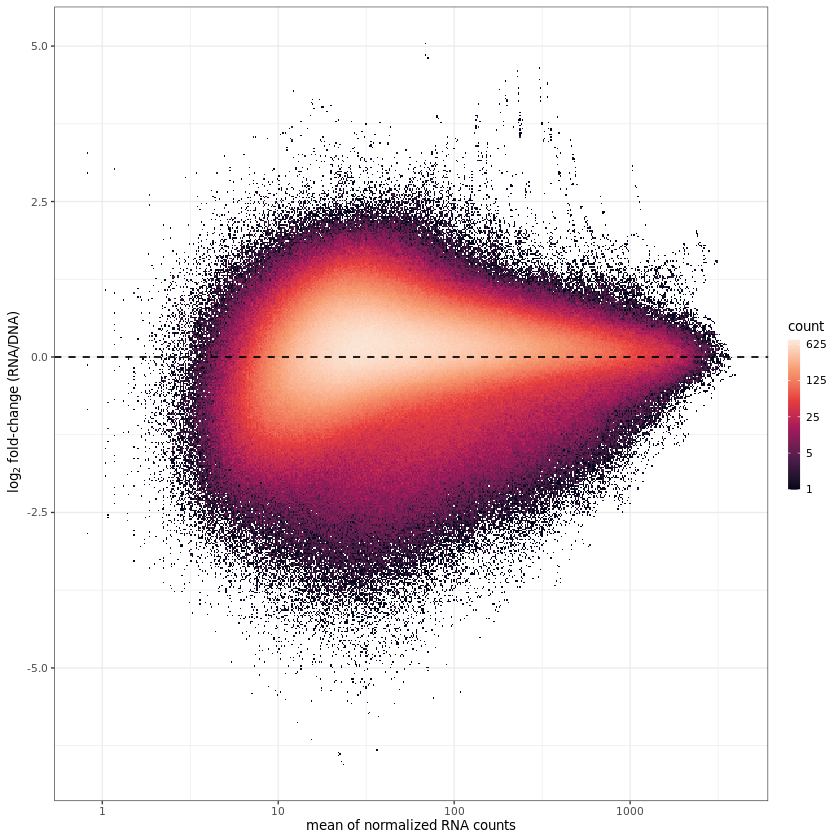

In [36]:
#RNA only 
#make mean normalized counts column:

bins_df$mean_counts <- rowMeans(bins_df[ , c(10,11,12)], na.rm=TRUE)

MA_plot <- ggplot(bins_df) +
  geom_bin2d(aes(y=log2FoldChange, x=mean_counts), bins = 500) +
  scale_x_continuous(trans='log10') +
  scale_fill_viridis_c(trans = "log", breaks = c(1, 5, 25, 125, 625, 3125), option = "rocket") +
  geom_hline(yintercept = c(0), linetype = "dashed") +
  ylab(bquote(~log[2]~"fold-change (RNA/DNA)")) +
  xlab("mean of normalized RNA counts") +
  theme_bw(base_size = 8, base_family = "Arial") +
  theme(legend.position = "right", legend.key.height = unit(0.25, units = "in"), legend.key.width = unit(0.1, units = "in"))# +
 #coord_cartesian(xlim = c(-5,5), ylim = c(0,100))

MA_plot

res_dir <- '/data/hodges_lab/ATAC-STARR_B-cells/results/NAR_paper_figures'
ggsave(MA_plot, filename = paste0(res_dir, "/MA-plot_RNA.pdf"), device = cairo_pdf, width = 3, height = 3)

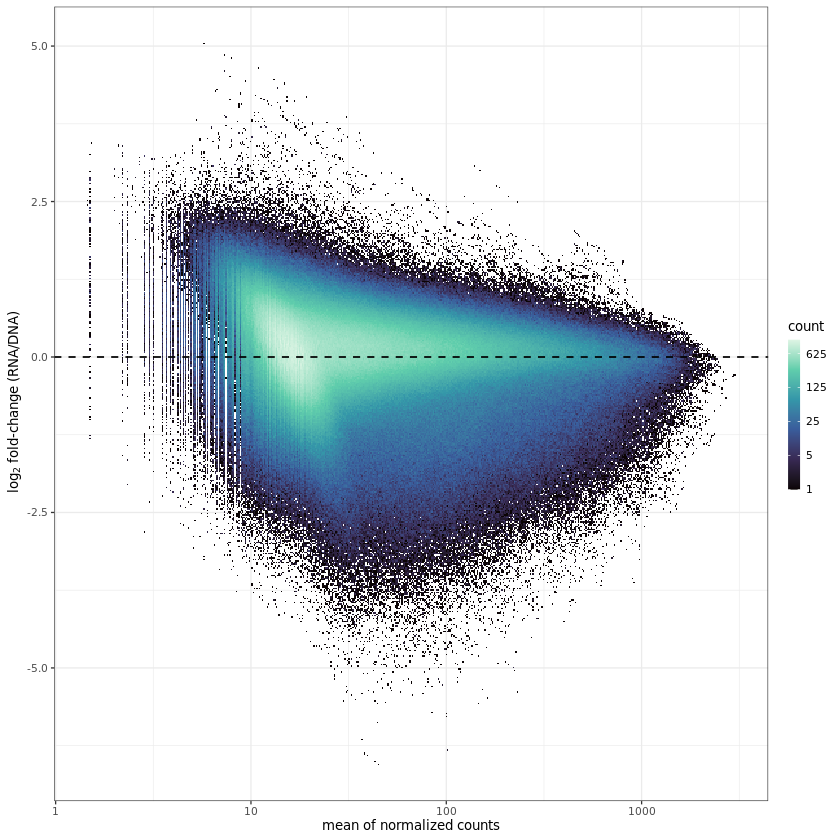

In [37]:
#DNA only
#make mean normalized counts column:

bins_df$mean_counts <- rowMeans(bins_df[ , c(7,8,9)], na.rm=TRUE)

MA_plot <- ggplot(bins_df) +
  geom_bin2d(aes(y=log2FoldChange, x=mean_counts), bins = 500) +
  scale_x_continuous(trans='log10') +
  scale_fill_viridis_c(trans = "log", breaks = c(1, 5, 25, 125, 625, 3125), option = "mako") +
  geom_hline(yintercept = c(0), linetype = "dashed") +
  ylab(bquote(~log[2]~"fold-change (RNA/DNA)")) +
  xlab("mean of normalized counts") +
  theme_bw(base_size = 8, base_family = "Arial") +
  theme(legend.position = "right", legend.key.height = unit(0.25, units = "in"), legend.key.width = unit(0.1, units = "in"))# +
 #coord_cartesian(xlim = c(-5,5), ylim = c(0,100))

MA_plot

res_dir <- '/data/hodges_lab/ATAC-STARR_B-cells/results/NAR_paper_figures'
ggsave(MA_plot, filename = paste0(res_dir, "/MA-plot_DNA.pdf"), device = cairo_pdf, width = 3, height = 3)

Based on this, it looks like, in general, the silent regions have large DNA counts, while active regions have smaller DNA counts. This might be expected but it seems like silent regions maybe more often in regions of more accessible chromatin. 

To speculate, this could be why we see a skew in our volcano plot. A potential difference between us and hidra that would explain this, is the promoter we are using. We might have a lower basal transcription rate?

#### MA pvalue plot

Warning message:
“Removed 1277132 rows containing non-finite values (stat_bin2d).”


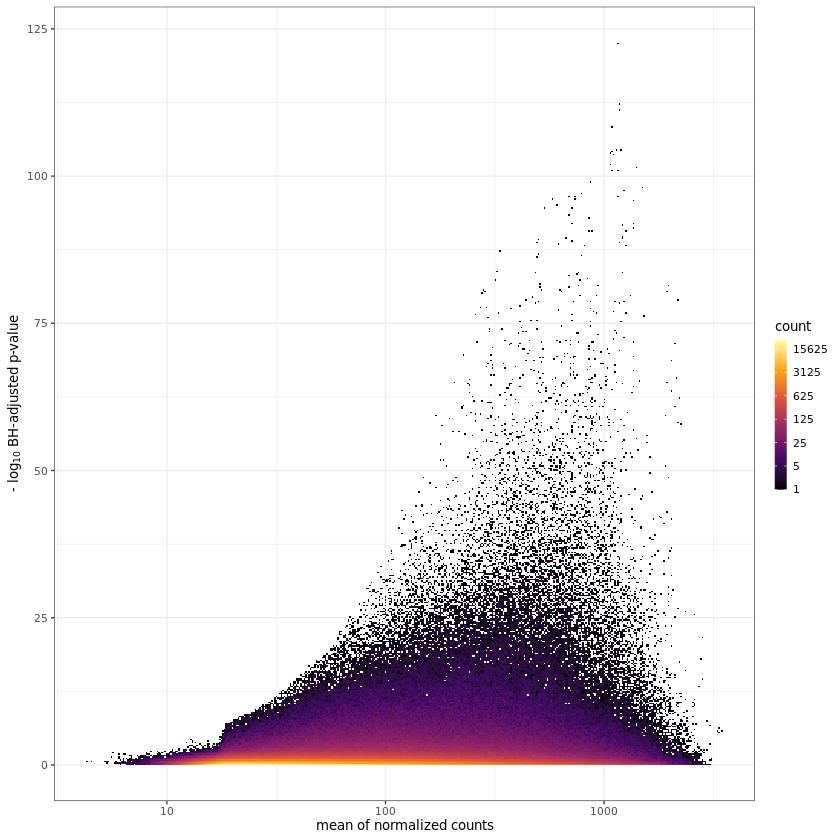

In [34]:
MAp_plot <- ggplot(bins_df) +
  geom_bin2d(aes(y=-log10(padj), x=mean_counts), bins = 500) +
  scale_fill_viridis_c(trans = "log", breaks = c(1, 5, 25, 125, 625, 3125, 15625), option = "inferno") +
  ylab(bquote("-"~log[10]~"BH-adjusted p-value")) +
  xlab("mean of normalized counts") +
  theme_bw(base_size = 8, base_family = "Arial") +
  theme(legend.position = "right", legend.key.height = unit(0.25, units = "in"), legend.key.width = unit(0.1, units = "in")) +
  #coord_cartesian(xlim = c(0,4000)) +
  scale_x_continuous(trans='log10')

MAp_plot

#### pvalue distribution

Warning message:
“Removed 1939 rows containing non-finite values (stat_density).”
Warning message:
“Removed 1277132 rows containing non-finite values (stat_density).”


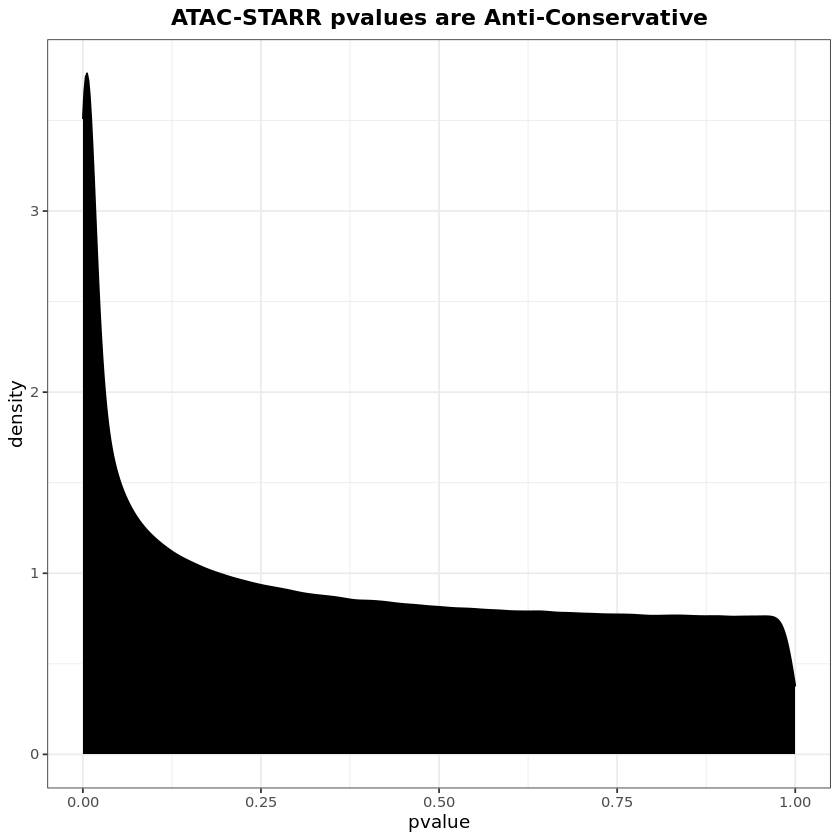

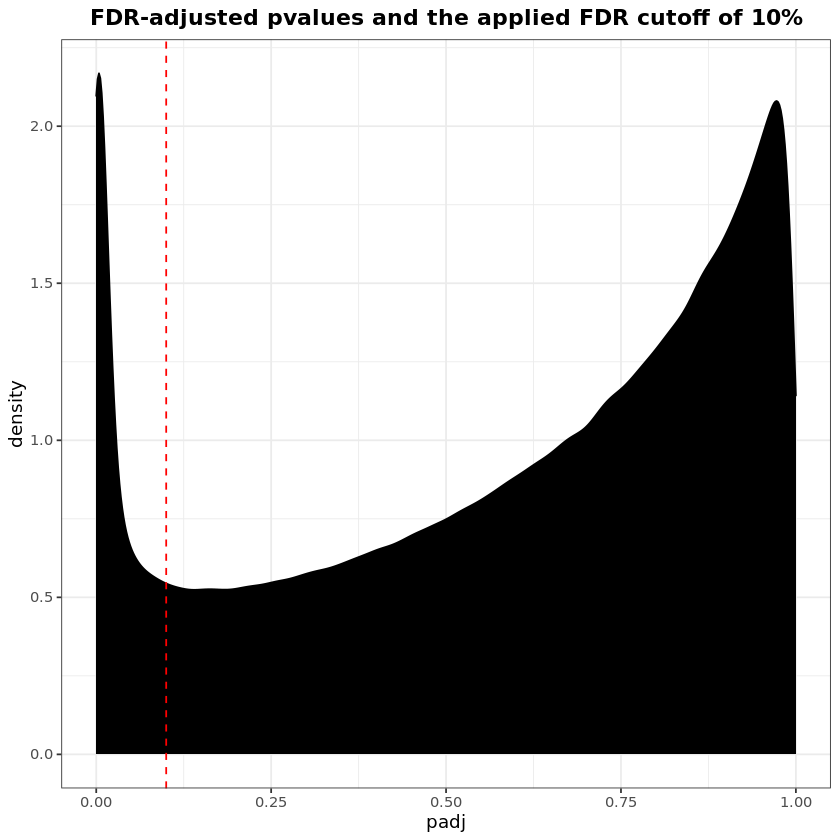

In [35]:
# lets look at pval and padj distribution: 
ggplot(bins_df, aes(x=pvalue)) +
    geom_density(fill="black") +
    ggtitle("ATAC-STARR pvalues are Anti-Conservative") +
    theme_bw() +
    theme(plot.title = element_text(hjust = 0.5, face = "bold"))
    
ggplot(bins_df, aes(x=padj)) +
    geom_density(fill="black") +
    geom_vline(xintercept = 0.1, linetype = "dashed", color = "red") +
    ggtitle("FDR-adjusted pvalues and the applied FDR cutoff of 10%") +
    theme_bw() +
    theme(plot.title = element_text(hjust = 0.5, face = "bold"))
    #coord_cartesian(xlim = c(0, 6))

#### L2FC distribution 

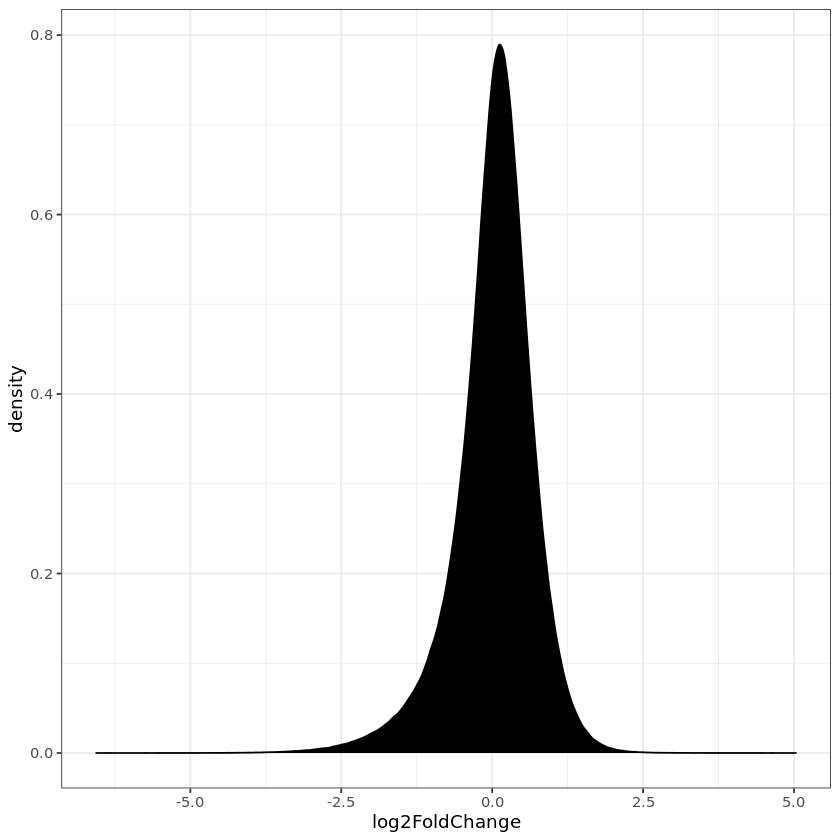

In [36]:
ggplot(bins_df, aes(x=log2FoldChange)) + 
    geom_density(fill="black") +
    theme_bw()

#### Independant filtering drives the NA values we see

Following the logic from section 2.5, the observation of padj being NA when pval is not is due to independent filtering and this is applied before shrinkage. There are lines of code from the manual to investigate this further. Do this then report below. 

In [25]:
metadata(res)$filterThreshold

21.32653% 
 18.90066

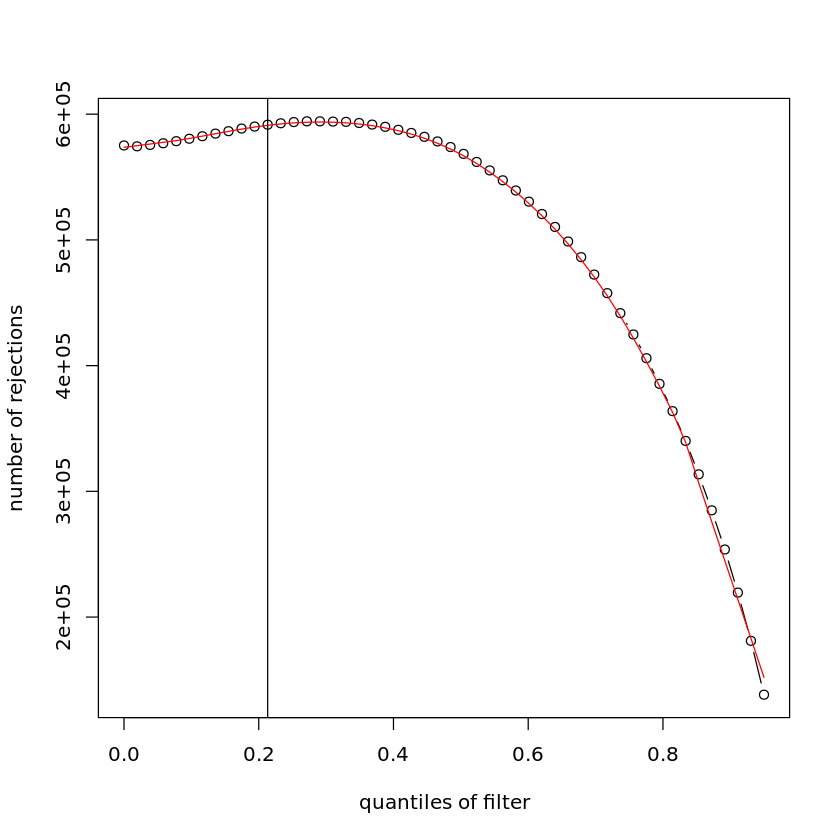

In [26]:
plot(metadata(res)$filterNumRej, 
     type="b", ylab="number of rejections",
     xlab="quantiles of filter")
lines(metadata(res)$lo.fit, col="red")
abline(v=metadata(res)$filterTheta)

In [27]:
resNoFilt <- results(dds, independentFiltering=FALSE)
addmargins(table(filtering=(res$padj < .1),
                 noFiltering=(resNoFilt$padj < .1)))

,FALSE,TRUE,Sum
FALSE,4110894,0,4110894
TRUE,44720,546912,591632
Sum,4155614,546912,4702526


Filtering represented by rows. non filtering represented by columns.

Therefore, 0 bins have a padj < 0.1 when not filtered but not a padj < 0.1 when filtered. On the other hand, 44720 bins have a padj < 0.1 when filtered but not a padj < 0.1 when not filtered. This shows the improvement in power when independent filtering is applied. 

#### Summary regarding NA values

Conclusion 1: Shrinkage doesn't appear to affect the number of regions called as active or silent or the number of NA values returned for padj. It does affect the l2FC values as expected. These values are the true values, so it may make sense to keep ATAC-STARR results with shrinkage off. I'll need to talk to Emily about this though. We decided to turn off shrinkage for ATAC-STARR region calling. Use the no-shrinkage regions for downstream analysis. 

Conclusion 2: The reason for the NA is independent filtering applied when calculating padj values. NA values are best thought of as regions with low counts and are removed to improve statistical power. This improves detection of 44,720 bins and should be left on.  

### region calling with size selection

#### Size select bam files

In [2]:
#Variables:
INPUT_DIR='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates'

for i in GM12878inGM12878_DNA_Rep1 GM12878inGM12878_DNA_Rep2 GM12878inGM12878_RNA_Rep1 GM12878inGM12878_RNA_Rep2 GM12878inGM12878_RNA_Rep3 
do
    #Grabbed this line of code from a tutorial on github. 
    samtools view -h -@ 12 ${INPUT_DIR}/${i}.filtered.pos-sorted.bam | \
      awk 'substr($0,1,1)=="@" || ($9>= 150) || ($9<=-150)' | \
      samtools view -b -@ 12 | samtools sort -n -@ 12 > ${INPUT_DIR}/${i}.150nt-or-greater.n-sorted.bam

    samtools view -h -@ 12 ${INPUT_DIR}/${i}.filtered.pos-sorted.bam | \
      awk 'substr($0,1,1)=="@" || ($9< 150) || ($9> -150)' | \
      samtools view -b -@ 12 | samtools sort -n -@ 12 > ${INPUT_DIR}/${i}.less-than-150nt.n-sorted.bam
done

[bam_sort_core] merging from 0 files and 12 in-memory blocks...
[bam_sort_core] merging from 24 files and 12 in-memory blocks...
[bam_sort_core] merging from 0 files and 12 in-memory blocks...
[bam_sort_core] merging from 12 files and 12 in-memory blocks...
[bam_sort_core] merging from 0 files and 12 in-memory blocks...
[bam_sort_core] merging from 0 files and 12 in-memory blocks...
[bam_sort_core] merging from 12 files and 12 in-memory blocks...
[bam_sort_core] merging from 36 files and 12 in-memory blocks...
[bam_sort_core] merging from 24 files and 12 in-memory blocks...
[bam_sort_core] merging from 48 files and 12 in-memory blocks...
[bam_sort_core] merging from 12 files and 12 in-memory blocks...
[bam_sort_core] merging from 36 files and 12 in-memory blocks...


In [1]:
#Variables:
INPUT_DIR='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates'

for i in GM12878inGM12878_DNA_Rep3
do
    #Grabbed this line of code from a tutorial on github. 
    samtools view -h -@ 12 ${INPUT_DIR}/${i}.filtered.pos-sorted.bam | \
      awk 'substr($0,1,1)=="@" || ($9>= 150) || ($9<=-150)' | \
      samtools view -b -@ 12 | samtools sort -n -@ 12 > ${INPUT_DIR}/${i}.150nt-or-greater.n-sorted.bam

    samtools view -h -@ 12 ${INPUT_DIR}/${i}.filtered.pos-sorted.bam | \
      awk 'substr($0,1,1)=="@" || ($9< 150) || ($9> -150)' | \
      samtools view -b -@ 12 | samtools sort -n -@ 12 > ${INPUT_DIR}/${i}.less-than-150nt.n-sorted.bam
done

[bam_sort_core] merging from 12 files and 12 in-memory blocks...
[bam_sort_core] merging from 24 files and 12 in-memory blocks...


In [1]:
#Variables:
INPUT_DIR='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates'

for i in GM12878inGM12878_DNA_Rep1 GM12878inGM12878_DNA_Rep2
do
    #Grabbed this line of code from a tutorial on github. 
    samtools view -h -@ 12 ${INPUT_DIR}/${i}.unique.pos-sorted.bam | \
      awk 'substr($0,1,1)=="@" || ($9>= 150) || ($9<=-150)' | \
      samtools view -b -@ 12 | samtools sort -n -@ 12 > ${INPUT_DIR}/${i}.150nt-or-greater.unique.n-sorted.bam

    samtools view -h -@ 12 ${INPUT_DIR}/${i}.unique.pos-sorted.bam | \
      awk 'substr($0,1,1)=="@" || ($9< 150) || ($9> -150)' | \
      samtools view -b -@ 12 | samtools sort -n -@ 12 > ${INPUT_DIR}/${i}.less-than-150nt.unique.n-sorted.bam
done

[bam_sort_core] merging from 0 files and 12 in-memory blocks...
[bam_sort_core] merging from 12 files and 12 in-memory blocks...
[bam_sort_core] merging from 0 files and 12 in-memory blocks...
[bam_sort_core] merging from 12 files and 12 in-memory blocks...
[bam_sort_core] merging from 0 files and 12 in-memory blocks...
[bam_sort_core] merging from 0 files and 12 in-memory blocks...


In [2]:
#Variables:
INPUT_DIR='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates'

for i in GM12878inGM12878_DNA_Rep3
do
    #Grabbed this line of code from a tutorial on github. 
    samtools view -h -@ 12 ${INPUT_DIR}/${i}.unique.pos-sorted.bam | \
      awk 'substr($0,1,1)=="@" || ($9>= 150) || ($9<=-150)' | \
      samtools view -b -@ 12 | samtools sort -n -@ 12 > ${INPUT_DIR}/${i}.150nt-or-greater.unique.n-sorted.bam

    samtools view -h -@ 12 ${INPUT_DIR}/${i}.unique.pos-sorted.bam | \
      awk 'substr($0,1,1)=="@" || ($9< 150) || ($9> -150)' | \
      samtools view -b -@ 12 | samtools sort -n -@ 12 > ${INPUT_DIR}/${i}.less-than-150nt.unique.n-sorted.bam
done

[bam_sort_core] merging from 0 files and 12 in-memory blocks...
[bam_sort_core] merging from 24 files and 12 in-memory blocks...


#### Call active and silent regions with size selected files

In [1]:
%%bash
PEAKS='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/ChrAcc_peaks/GM12878inGM12878_DNA_genrich_3-replicates_0.0001-qvalue.narrowPeak'
BAMS='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates'
OUT_DIR='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_less-than-150nt'

#set up
cd /data/hodges_lab/ATAC-STARR_B-cells/bin/activity_analysis/call_active_peaks
mkdir /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_less-than-150nt
mkdir /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_150nt-or-greater

#GG_3-replicates_0.1 q-value less-than-150nt
python3 call_ATAC-STARR_regulatory-regions.py -i $PEAKS -o $OUT_DIR -q 0.1 \
    -d ${BAMS}/GM12878inGM12878_DNA_Rep1.less-than-150nt.n-sorted.bam ${BAMS}/GM12878inGM12878_DNA_Rep2.less-than-150nt.n-sorted.bam ${BAMS}/GM12878inGM12878_DNA_Rep3.less-than-150nt.n-sorted.bam \
    -r ${BAMS}/GM12878inGM12878_RNA_Rep1.less-than-150nt.n-sorted.bam ${BAMS}/GM12878inGM12878_RNA_Rep2.less-than-150nt.n-sorted.bam ${BAMS}/GM12878inGM12878_RNA_Rep3.less-than-150nt.n-sorted.bam

OUT_DIR='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_150nt-or-greater'
#GG_3-replicates_0.1 q-value 150nt-or-greater
python3 call_ATAC-STARR_regulatory-regions.py -i $PEAKS -o $OUT_DIR -q 0.1 \
    -d ${BAMS}/GM12878inGM12878_DNA_Rep1.150nt-or-greater.n-sorted.bam ${BAMS}/GM12878inGM12878_DNA_Rep2.150nt-or-greater.n-sorted.bam ${BAMS}/GM12878inGM12878_DNA_Rep3.150nt-or-greater.n-sorted.bam \
    -r ${BAMS}/GM12878inGM12878_RNA_Rep1.150nt-or-greater.n-sorted.bam ${BAMS}/GM12878inGM12878_RNA_Rep2.150nt-or-greater.n-sorted.bam ${BAMS}/GM12878inGM12878_RNA_Rep3.150nt-or-greater.n-sorted.bam

PARAMETERS:
ChrAcc Peaks File: /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/ChrAcc_peaks/GM12878inGM12878_DNA_genrich_3-replicates_0.0001-qvalue.narrowPeak
DNA Files: /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates/GM12878inGM12878_DNA_Rep1.less-than-150nt.n-sorted.bam /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates/GM12878inGM12878_DNA_Rep2.less-than-150nt.n-sorted.bam /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates/GM12878inGM12878_DNA_Rep3.less-than-150nt.n-sorted.bam
RNA Files: /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates/GM12878inGM12878_RNA_Rep1.less-than-150nt.n-sorted.bam /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates/GM12878inGM12878_RNA_Rep2.less-than-150nt.n-sorted.bam /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates/GM12878inGM12878_RNA_Rep3.less-than-150nt.n-sorted.bam
Output Dire

mkdir: cannot create directory ‘/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_less-than-150nt’: File exists
mkdir: cannot create directory ‘/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_150nt-or-greater’: File exists

        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v2.0.1

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 6 BAM files                          

In [2]:
%%bash 
#how many regions called for each? 
wc -l /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_150nt-or-greater/active_regions.bed
wc -l /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_150nt-or-greater/silent_regions.bed

wc -l /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_less-than-150nt/active_regions.bed
wc -l /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_less-than-150nt/silent_regions.bed

18121 /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_150nt-or-greater/active_regions.bed
16084 /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_150nt-or-greater/silent_regions.bed
30078 /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_less-than-150nt/active_regions.bed
21125 /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_less-than-150nt/silent_regions.bed


In [1]:
#view volcano plots from each:
#setup
library(tidyverse)
library(DESeq2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The follow

In [2]:
load("/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_150nt-or-greater/res.Rdata")

Warning message:
“Removed 1731677 rows containing non-finite values (stat_bin2d).”


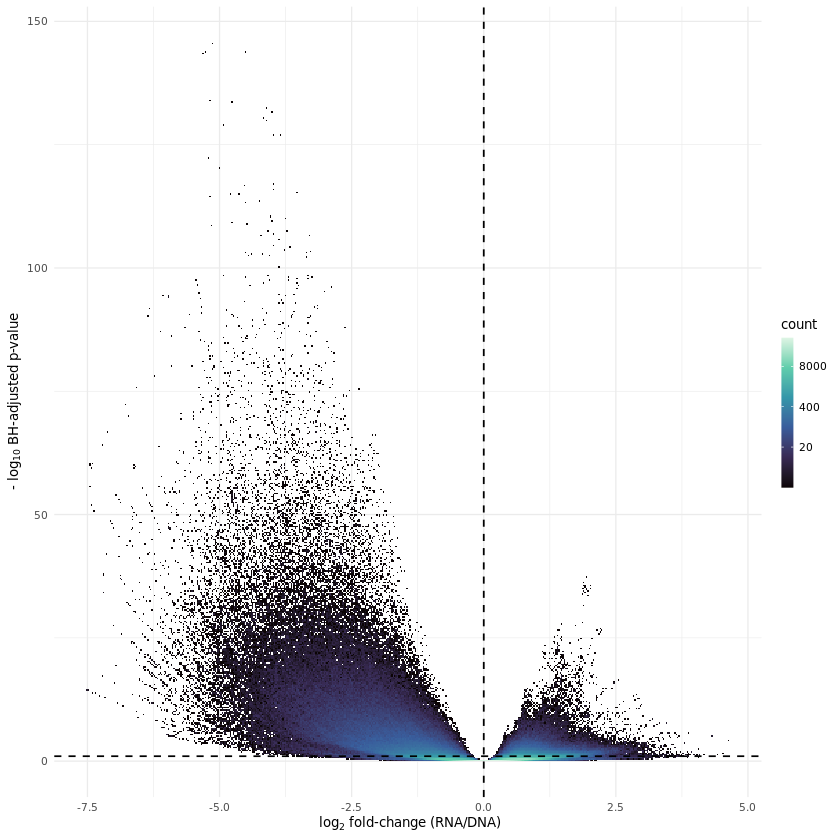

In [3]:
res_df <- as.data.frame(res) %>% rownames_to_column(var = "Bin_ID")

volcano <- ggplot(res_df) +
  geom_bin2d(aes(x=log2FoldChange, y=-log10(padj)), bins = 500) +
  scale_fill_viridis_c(trans = "log", breaks = c(0, 20, 400, 8000, 160000), option = "mako") +
  geom_hline(yintercept = c(-log10(0.1)), linetype = "dashed") +
  geom_vline(xintercept = c(0), linetype = "dashed") +
  xlab(bquote(~log[2]~"fold-change (RNA/DNA)")) +
  ylab(bquote("-"~log[10]~"BH-adjusted p-value")) +
  theme_minimal(base_size = 8, base_family = "Arial") +
  theme(legend.position = "right", legend.key.height = unit(0.25, units = "in"), legend.key.width = unit(0.1, units = "in"), axis.title = element_text(face = "bold"))# +
 #coord_cartesian(xlim = c(-5,5), ylim = c(0,100))

volcano

In [4]:
load("/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_less-than-150nt/res.Rdata")

Warning message:
“Removed 1277132 rows containing non-finite values (stat_bin2d).”


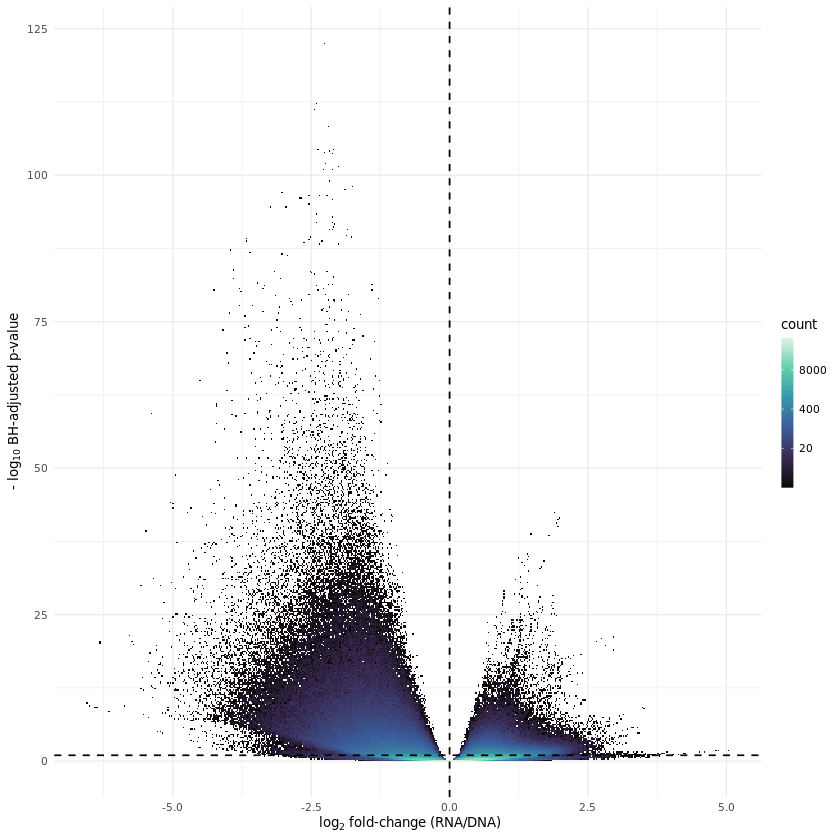

In [5]:
res_df <- as.data.frame(res) %>% rownames_to_column(var = "Bin_ID")

volcano <- ggplot(res_df) +
  geom_bin2d(aes(x=log2FoldChange, y=-log10(padj)), bins = 500) +
  scale_fill_viridis_c(trans = "log", breaks = c(0, 20, 400, 8000, 160000), option = "mako") +
  geom_hline(yintercept = c(-log10(0.1)), linetype = "dashed") +
  geom_vline(xintercept = c(0), linetype = "dashed") +
  xlab(bquote(~log[2]~"fold-change (RNA/DNA)")) +
  ylab(bquote("-"~log[10]~"BH-adjusted p-value")) +
  theme_minimal(base_size = 8, base_family = "Arial") +
  theme(legend.position = "right", legend.key.height = unit(0.25, units = "in"), legend.key.width = unit(0.1, units = "in"), axis.title = element_text(face = "bold"))# +
 #coord_cartesian(xlim = c(-5,5), ylim = c(0,100))

volcano

It looks like size doesn't alter the distribution of pval or log2FC. It does alter count, but that is more likely due to read depth differences. 

Try how this affects open chromatin. 

#### Call ChrAcc peaks

In [3]:
#Variables:
INPUT_DIR='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates'
OUTPUT_DIR='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/ChrAcc_peaks'

Genrich -t ${INPUT_DIR}/GM12878inGM12878_DNA_Rep1.150nt-or-greater.unique.n-sorted.bam,${INPUT_DIR}/GM12878inGM12878_DNA_Rep2.150nt-or-greater.unique.n-sorted.bam,${INPUT_DIR}/GM12878inGM12878_DNA_Rep3.150nt-or-greater.unique.n-sorted.bam \
    -o ${OUTPUT_DIR}/GM12878inGM12878_DNA_genrich_3-replicates_150nt-or-greater.narrowPeak -j -v

Processing experimental file #0: /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates/GM12878inGM12878_DNA_Rep1.150nt-or-greater.unique.n-sorted.bam
  BAM records analyzed:   17995695
    Paired alignments:    17995695
      "orphan" alns:           173
    Unpaired alignments:         0
  Fragments analyzed:      8997761
    Full fragments:        8997761
    ATAC-seq cut sites:   17995522
      (expanded to length 100bp)
- control file #0 not provided -
  Background pileup value: 0.560733
Processing experimental file #1: /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates/GM12878inGM12878_DNA_Rep2.150nt-or-greater.unique.n-sorted.bam
  BAM records analyzed:   14459340
    Paired alignments:    14459340
      "orphan" alns:           118
    Unpaired alignments:         0
  Fragments analyzed:      7229611
    Full fragments:        7229611
    ATAC-seq cut sites:   14459222
      (expanded to length 100bp)
- control file #1 not pro

In [4]:
#Variables:
INPUT_DIR='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates'
OUTPUT_DIR='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/ChrAcc_peaks'

Genrich -t ${INPUT_DIR}/GM12878inGM12878_DNA_Rep1.less-than-150nt.unique.n-sorted.bam,${INPUT_DIR}/GM12878inGM12878_DNA_Rep2.less-than-150nt.unique.n-sorted.bam,${INPUT_DIR}/GM12878inGM12878_DNA_Rep3.less-than-150nt.unique.n-sorted.bam \
    -o ${OUTPUT_DIR}/GM12878inGM12878_DNA_genrich_3-replicates_less-than-150nt.narrowPeak -j -v

Processing experimental file #0: /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates/GM12878inGM12878_DNA_Rep1.less-than-150nt.unique.n-sorted.bam
  BAM records analyzed:   45252363
    Paired alignments:    45252363
      "orphan" alns:           173
    Unpaired alignments:         0
  Fragments analyzed:     22626095
    Full fragments:       22626095
    ATAC-seq cut sites:   45252190
      (expanded to length 100bp)
- control file #0 not provided -
  Background pileup value: 1.325799
Processing experimental file #1: /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates/GM12878inGM12878_DNA_Rep2.less-than-150nt.unique.n-sorted.bam
  BAM records analyzed:   40031374
    Paired alignments:    40031374
      "orphan" alns:           118
    Unpaired alignments:         0
  Fragments analyzed:     20015628
    Full fragments:       20015628
    ATAC-seq cut sites:   40031256
      (expanded to length 100bp)
- control file #1 not provi

In [1]:
%%bash
#Filter and compare the two peaksets
OUTPUT_DIR='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/ChrAcc_peaks'

#q=<0.0001
awk '$9 >=4' ${OUTPUT_DIR}/GM12878inGM12878_DNA_genrich_3-replicates_150nt-or-greater.narrowPeak > \
    ${OUTPUT_DIR}/GM12878inGM12878_DNA_genrich_3-replicates_150nt-or-greater_0.0001-qvalue.narrowPeak

#q=<0.0001
awk '$9 >=4' ${OUTPUT_DIR}/GM12878inGM12878_DNA_genrich_3-replicates_less-than-150nt.narrowPeak > \
    ${OUTPUT_DIR}/GM12878inGM12878_DNA_genrich_3-replicates_less-than-150nt_0.0001-qvalue.narrowPeak
    
wc -l ${OUTPUT_DIR}/GM12878inGM12878_DNA_genrich_3-replicates_150nt-or-greater_0.0001-qvalue.narrowPeak
wc -l ${OUTPUT_DIR}/GM12878inGM12878_DNA_genrich_3-replicates_less-than-150nt_0.0001-qvalue.narrowPeak

bedtools jaccard -a ${OUTPUT_DIR}/GM12878inGM12878_DNA_genrich_3-replicates_less-than-150nt_0.0001-qvalue.narrowPeak \
    -b ${OUTPUT_DIR}/GM12878inGM12878_DNA_genrich_3-replicates_150nt-or-greater_0.0001-qvalue.narrowPeak

82508 /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/ChrAcc_peaks/GM12878inGM12878_DNA_genrich_3-replicates_150nt-or-greater_0.0001-qvalue.narrowPeak
101904 /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/ChrAcc_peaks/GM12878inGM12878_DNA_genrich_3-replicates_less-than-150nt_0.0001-qvalue.narrowPeak
intersection	union	jaccard	n_intersections
59011011	80955715	0.72893	79227


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



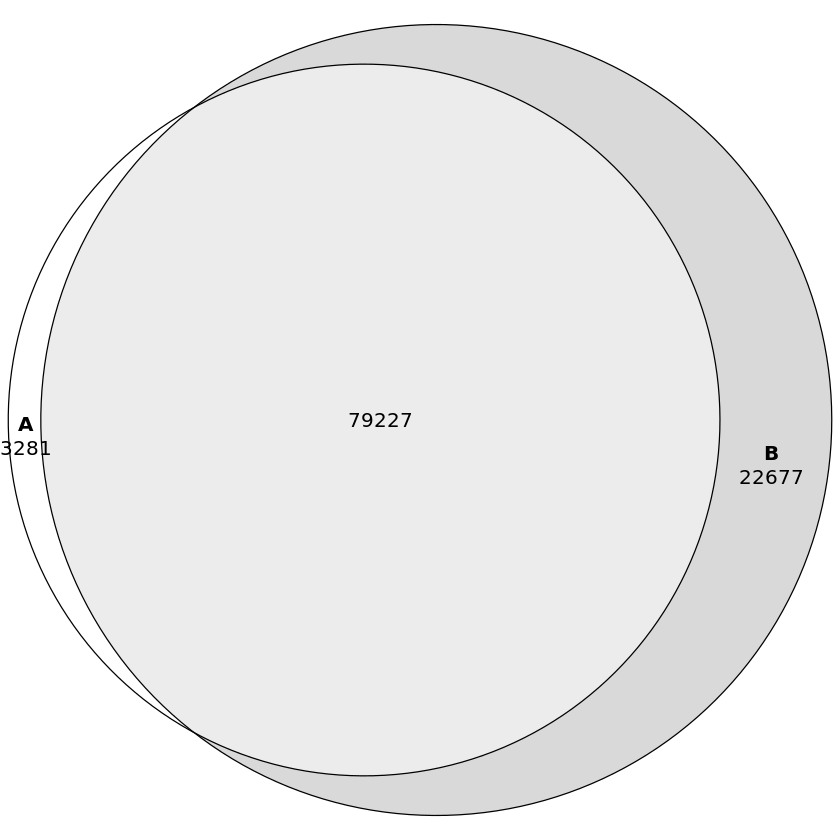

In [1]:
#make euler plot with values above. 
library(tidyverse)
library(eulerr)

#set names to variables
A_name <- "`>=150`"
B_name <- "`<150`"

#set values to variables:
A_B <- 79227
A <- 82508
B <- 101904

#make named list using variables above. This shouldn't change for all 3-way comparisons. 
combo <- c(A = A-A_B, B = B-A_B, 
           `A&B` = A_B)

eul <- plot(euler(combo), quantities = TRUE) 
eul

#save and edit in illustrator. 
dir <- '/data/hodges_lab/ATAC-STARR_B-cells/results/hidra-vs-AS_active-regions'
ggsave(plot = eul, paste0(dir,"/euler-plot_AS_size-selection-ChrAcc.pdf"), width = 3, height = 3)

In [1]:
#Are these peaks different in annotation?
library(tidyverse)
library(ChIPseeker)
library(TxDb.Hsapiens.UCSC.hg38.knownGene)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



ChIPseeker v1.28.3  For help: https://guangchuangyu.github.io/software/ChIPseeker

If you use ChIPseeker in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Qing-Yu He. ChIPseeker: an R/Bioconductor package for ChIP peak annotation, comparison and visualization. Bioinformatics 2015, 31(14):2382-2383

Loading required package: GenomicFeatures

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, cl

>> loading peak file...				 2021-11-01 10:15:43 PM 
>> preparing features information...		 2021-11-01 10:15:44 PM 
>> identifying nearest features...		 2021-11-01 10:15:46 PM 
>> calculating distance from peak to TSS...	 2021-11-01 10:15:49 PM 
>> assigning genomic annotation...		 2021-11-01 10:15:49 PM 
>> adding gene annotation...			 2021-11-01 10:16:22 PM 


Loading required package: org.Hs.eg.db



'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2021-11-01 10:16:23 PM 
>> done...					 2021-11-01 10:16:23 PM 
>> loading peak file...				 2021-11-01 10:16:23 PM 
>> preparing features information...		 2021-11-01 10:16:25 PM 
>> identifying nearest features...		 2021-11-01 10:16:25 PM 
>> calculating distance from peak to TSS...	 2021-11-01 10:16:27 PM 
>> assigning genomic annotation...		 2021-11-01 10:16:27 PM 
>> adding gene annotation...			 2021-11-01 10:16:32 PM 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2021-11-01 10:16:33 PM 
>> done...					 2021-11-01 10:16:33 PM 


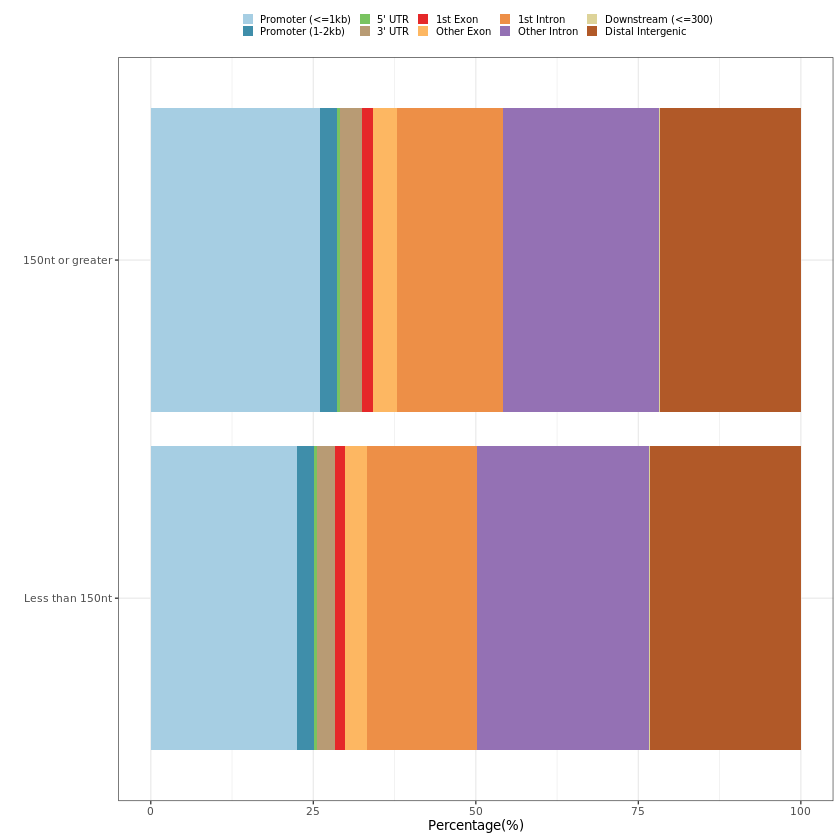

In [2]:
setwd("/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/ChrAcc_peaks")

greater_150 <- annotatePeak("GM12878inGM12878_DNA_genrich_3-replicates_150nt-or-greater_0.0001-qvalue.narrowPeak", 
    tssRegion = c(-2000, 1000), 
    TxDb = TxDb.Hsapiens.UCSC.hg38.knownGene, 
    annoDb = "org.Hs.eg.db", 
    flankDistance = 5000)
    
less_150 <- annotatePeak("GM12878inGM12878_DNA_genrich_3-replicates_less-than-150nt_0.0001-qvalue.narrowPeak", 
    tssRegion = c(-2000, 1000), 
    TxDb = TxDb.Hsapiens.UCSC.hg38.knownGene, 
    annoDb = "org.Hs.eg.db", 
    flankDistance = 5000)
    
    
plotAnnoBar(list(`150nt or greater`=greater_150, `Less than 150nt`=less_150)) + 
    theme_bw(base_size = 8, base_family = "Arial") + 
    theme(legend.key.size = unit(0.1, "in"), legend.title = element_blank(), plot.title = element_blank(), 
        legend.position = "top", legend.text = element_text(size = 6)) 

### Correlation Plots (no shrink results)

In [6]:
#Investigate the counts to understand the volcano plot.
#setup
library(tidyverse)
library(DESeq2)
load("/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_no-counts_no-shrink/res.Rdata")
res_df <- as.data.frame(res) %>% rownames_to_column(var = "Bin_ID")
load("/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_no-counts_no-shrink/dds.Rdata")

In [7]:
#extract normalized counts
cts_df <- counts(dds, normalized=TRUE) %>% as.data.frame() %>% rownames_to_column(var = "Bin_ID")

#join all bins with their counts. 
bins_df <- inner_join(res_df, cts_df, by = "Bin_ID")

head(bins_df)

,Bin_ID,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,DNA1,DNA2,DNA3,RNA1,RNA2,RNA3
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,bin_1,8.334317,-0.08400819,0.9591246,-0.0875884,0.9302038,NA,10.85649,6.623169,8.402344,0.7639394,22.57296,0.7870009
2,bin_2,10.118357,-0.20084498,0.8377193,-0.2397521,0.8105224,NA,12.21356,9.934753,10.502930,0.7639394,22.57296,4.7220057
3,bin_3,15.780312,-0.12947496,0.6379917,-0.2029415,0.8391808,NA,16.28474,16.557922,16.804688,14.5148493,25.79766,4.7220057
4,bin_4,21.168725,-0.33217391,0.5825897,-0.5701679,0.5685638,0.8244999,23.07005,21.525298,26.257325,22.9181831,27.73249,5.5090066
5,bin_5,25.839542,-0.30034328,0.5347798,-0.5616205,0.5743746,0.8276766,24.42711,26.492675,34.659670,25.9739409,34.82685,8.6570104
6,bin_6,28.434927,-0.24945276,0.4665874,-0.5346325,0.5929040,0.8376757,27.14124,26.492675,38.860842,25.9739409,34.82685,17.3140208


Warning message in cor.test.default(bins_df$RNA1, bins_df$RNA2, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  bins_df$RNA1 and bins_df$RNA2
S = 7.3245e+18, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.7944581 



	Pearson's product-moment correlation

data:  bins_df$RNA1 and bins_df$RNA2
t = 9312.7, df = 5979656, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9671598 0.9672632
sample estimates:
      cor 
0.9672116 


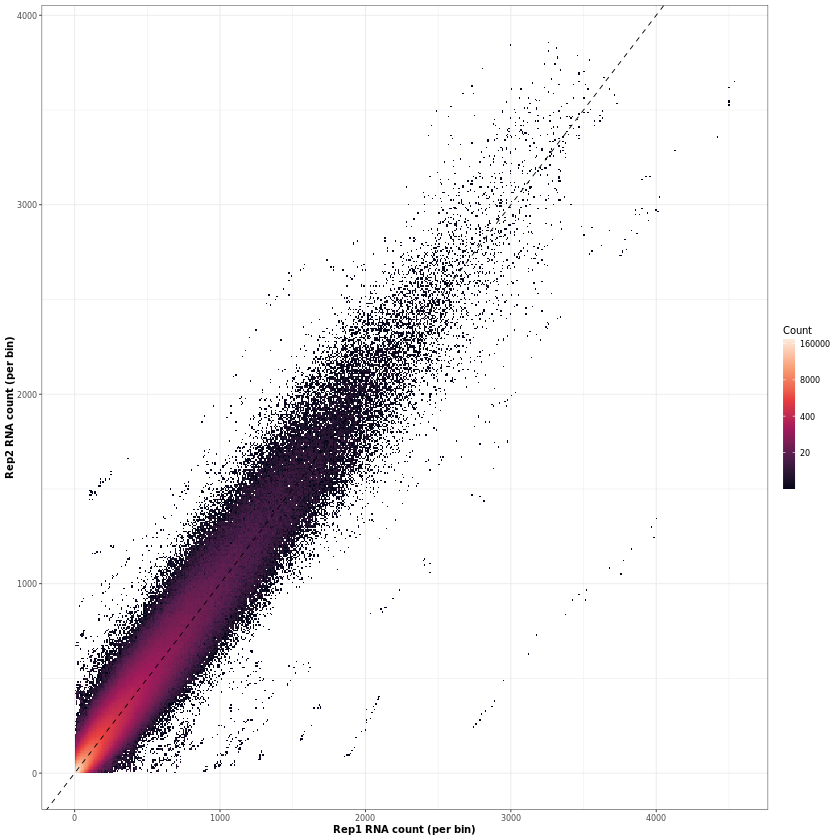

In [22]:
#RNA1 vs RNA2
cor.test(bins_df$RNA1, bins_df$RNA2, method = "spearman")
cor.test(bins_df$RNA1, bins_df$RNA2, method = "pearson")

p <- ggplot(bins_df) +
  geom_bin2d(aes(x=RNA1, y=RNA2), bins = 500) +
  scale_fill_viridis_c(trans = "log", breaks = c(0, 20, 400, 8000, 160000), option = "rocket") +
  geom_abline(mapping=aes(slope=1, intercept=0), colour="black", linetype="dashed", size=0.25) + 
  theme_bw(base_family = "Arial", base_size = 6) + 
  xlab("Rep1 RNA count (per bin)") + 
  ylab("Rep2 RNA count (per bin)") +
  labs(fill = "Count") +
  theme(legend.position = "right", legend.key.height = unit(0.25, units = "in"), 
        legend.key.width = unit(0.1, units = "in"), axis.title = element_text(face = "bold"))
p 

res <- '/data/hodges_lab/ATAC-STARR_B-cells/results/NAR_paper_figures'
ggsave(p, filename = paste0(res, "/corr_R1-R2.pdf"), device = cairo_pdf, width = 2, height = 2)

Warning message in cor.test.default(bins_df$RNA1, bins_df$RNA3, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  bins_df$RNA1 and bins_df$RNA3
S = 7.308e+18, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.7949222 



	Pearson's product-moment correlation

data:  bins_df$RNA1 and bins_df$RNA3
t = 8494.1, df = 5979656, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9609094 0.9610320
sample estimates:
      cor 
0.9609707 


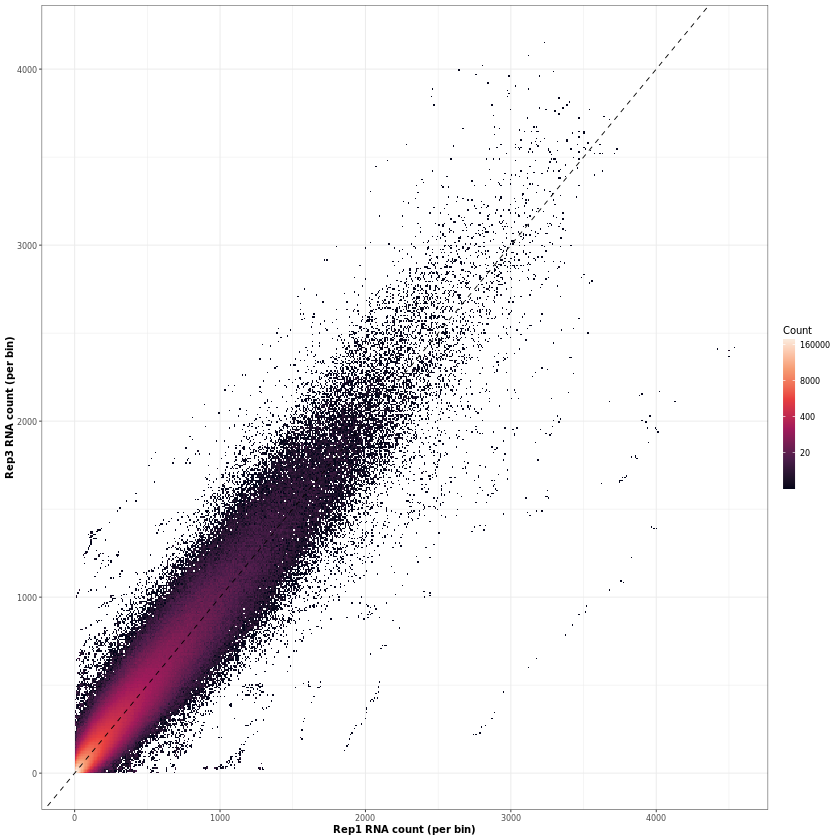

In [23]:
#RNA1 vs RNA3
cor.test(bins_df$RNA1, bins_df$RNA3, method = "spearman")
cor.test(bins_df$RNA1, bins_df$RNA3, method = "pearson")

p <- ggplot(bins_df) +
  geom_bin2d(aes(x=RNA1, y=RNA3), bins = 500) +
  scale_fill_viridis_c(trans = "log", breaks = c(0, 20, 400, 8000, 160000), option = "rocket") +
  geom_abline(mapping=aes(slope=1, intercept=0), colour="black", linetype="dashed", size=0.25) + 
  theme_bw(base_family = "Arial", base_size = 6) + 
  xlab("Rep1 RNA count (per bin)") + 
  ylab("Rep3 RNA count (per bin)") +
  labs(fill = "Count") +
  theme(legend.position = "right", legend.key.height = unit(0.25, units = "in"), 
        legend.key.width = unit(0.1, units = "in"), axis.title = element_text(face = "bold"))

p 

res <- '/data/hodges_lab/ATAC-STARR_B-cells/results/NAR_paper_figures'
ggsave(p, filename = paste0(res, "/corr_R1-R3.pdf"), device = cairo_pdf, width = 2, height = 2)

Warning message in cor.test.default(bins_df$RNA2, bins_df$RNA3, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  bins_df$RNA2 and bins_df$RNA3
S = 8.1089e+18, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.7724467 



	Pearson's product-moment correlation

data:  bins_df$RNA2 and bins_df$RNA3
t = 8291.5, df = 5979656, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9590924 0.9592207
sample estimates:
      cor 
0.9591566 


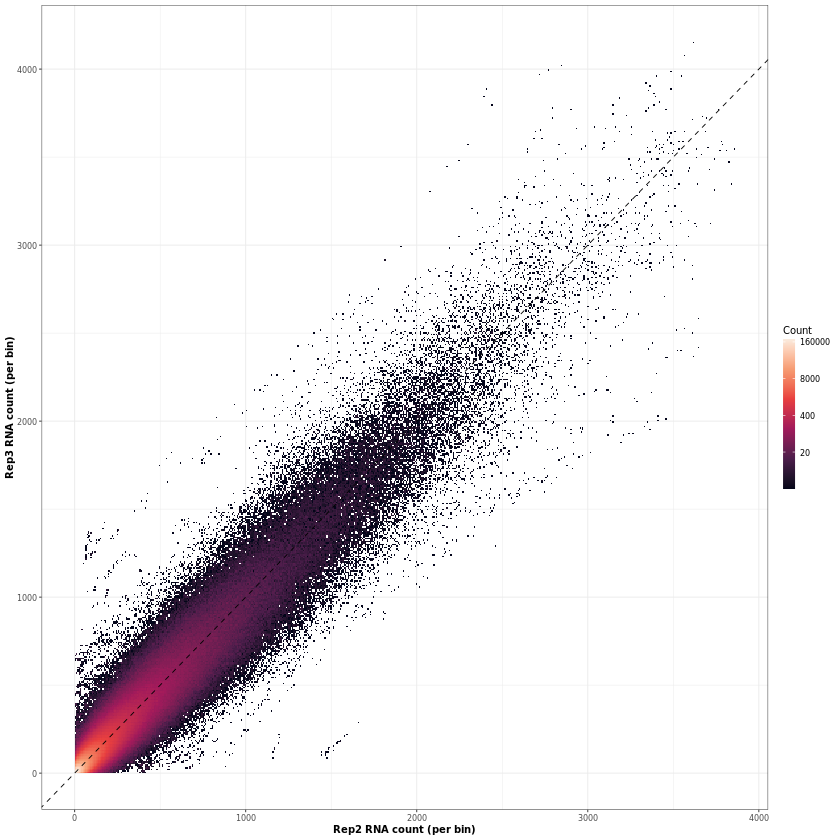

In [24]:
#RNA2 vs RNA3
cor.test(bins_df$RNA2, bins_df$RNA3, method = "spearman")
cor.test(bins_df$RNA2, bins_df$RNA3, method = "pearson")

p <- ggplot(bins_df) +
  geom_bin2d(aes(x=RNA2, y=RNA3), bins = 500) +
  scale_fill_viridis_c(trans = "log", breaks = c(0, 20, 400, 8000, 160000), option = "rocket") +
  geom_abline(mapping=aes(slope=1, intercept=0), colour="black", linetype="dashed", size=0.25) + 
  theme_bw(base_family = "Arial", base_size = 6) + 
  xlab("Rep2 RNA count (per bin)") + 
  ylab("Rep3 RNA count (per bin)") +
  labs(fill = "Count") +
  theme(legend.position = "right", legend.key.height = unit(0.25, units = "in"), 
        legend.key.width = unit(0.1, units = "in"), axis.title = element_text(face = "bold"))

p 

res <- '/data/hodges_lab/ATAC-STARR_B-cells/results/NAR_paper_figures'
ggsave(p, filename = paste0(res, "/corr_R2-R3.pdf"), device = cairo_pdf, width = 2, height = 2)

Warning message in cor.test.default(bins_df$DNA1, bins_df$DNA2, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  bins_df$DNA1 and bins_df$DNA2
S = 2.4608e+18, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.9309439 



	Pearson's product-moment correlation

data:  bins_df$DNA1 and bins_df$DNA2
t = 22832, df = 5979656, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9943042 0.9943224
sample estimates:
      cor 
0.9943133 


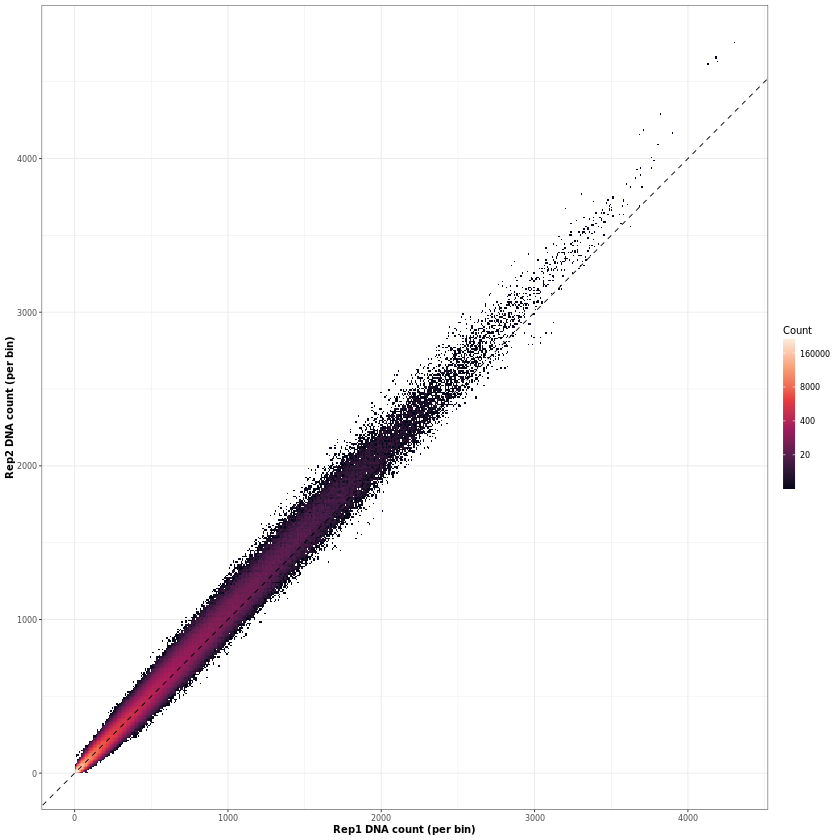

In [25]:
#DNA1 vs DNA2
cor.test(bins_df$DNA1, bins_df$DNA2, method = "spearman")
cor.test(bins_df$DNA1, bins_df$DNA2, method = "pearson")

p <- ggplot(bins_df) +
  geom_bin2d(aes(x=DNA1, y=DNA2), bins = 500) +
  scale_fill_viridis_c(trans = "log", breaks = c(0, 20, 400, 8000, 160000), option = "rocket") +
  geom_abline(mapping=aes(slope=1, intercept=0), colour="black", linetype="dashed", size=0.25) + 
  theme_bw(base_family = "Arial", base_size = 6) + 
  xlab("Rep1 DNA count (per bin)") + 
  ylab("Rep2 DNA count (per bin)") +
  labs(fill = "Count") +
  theme(legend.position = "right", legend.key.height = unit(0.25, units = "in"), 
        legend.key.width = unit(0.1, units = "in"), axis.title = element_text(face = "bold"))

p 

res <- '/data/hodges_lab/ATAC-STARR_B-cells/results/NAR_paper_figures'
ggsave(p, filename = paste0(res, "/corr_D1-D2.pdf"), device = cairo_pdf, width = 2, height = 2)

Warning message in cor.test.default(bins_df$DNA1, bins_df$DNA3, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  bins_df$DNA1 and bins_df$DNA3
S = 2.7593e+18, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.9225676 



	Pearson's product-moment correlation

data:  bins_df$DNA1 and bins_df$DNA3
t = 14227, df = 5979656, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9855249 0.9855709
sample estimates:
      cor 
0.9855479 


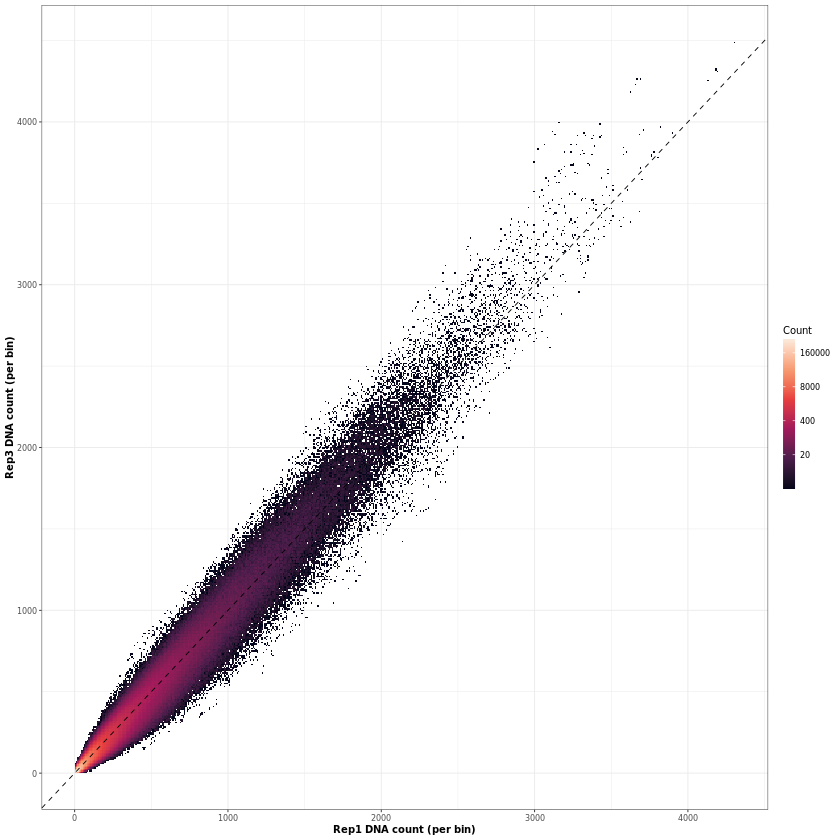

In [26]:
#DNA1 vs DNA3
cor.test(bins_df$DNA1, bins_df$DNA3, method = "spearman")
cor.test(bins_df$DNA1, bins_df$DNA3, method = "pearson")

p <- ggplot(bins_df) +
  geom_bin2d(aes(x=DNA1, y=DNA3), bins = 500) +
  scale_fill_viridis_c(trans = "log", breaks = c(0, 20, 400, 8000, 160000), option = "rocket") +
  geom_abline(mapping=aes(slope=1, intercept=0), colour="black", linetype="dashed", size=0.25) + 
  theme_bw(base_family = "Arial", base_size = 6) + 
  xlab("Rep1 DNA count (per bin)") + 
  ylab("Rep3 DNA count (per bin)") +
  labs(fill = "Count") +
  theme(legend.position = "right", legend.key.height = unit(0.25, units = "in"), 
        legend.key.width = unit(0.1, units = "in"), axis.title = element_text(face = "bold"))

p 

res <- '/data/hodges_lab/ATAC-STARR_B-cells/results/NAR_paper_figures'
ggsave(p, filename = paste0(res, "/corr_D1-D3.pdf"), device = cairo_pdf, width = 2, height = 2)

Warning message in cor.test.default(bins_df$DNA2, bins_df$DNA3, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  bins_df$DNA2 and bins_df$DNA3
S = 2.6281e+18, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.9262494 



	Pearson's product-moment correlation

data:  bins_df$DNA2 and bins_df$DNA3
t = 15270, df = 5979656, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9873982 0.9874383
sample estimates:
      cor 
0.9874183 


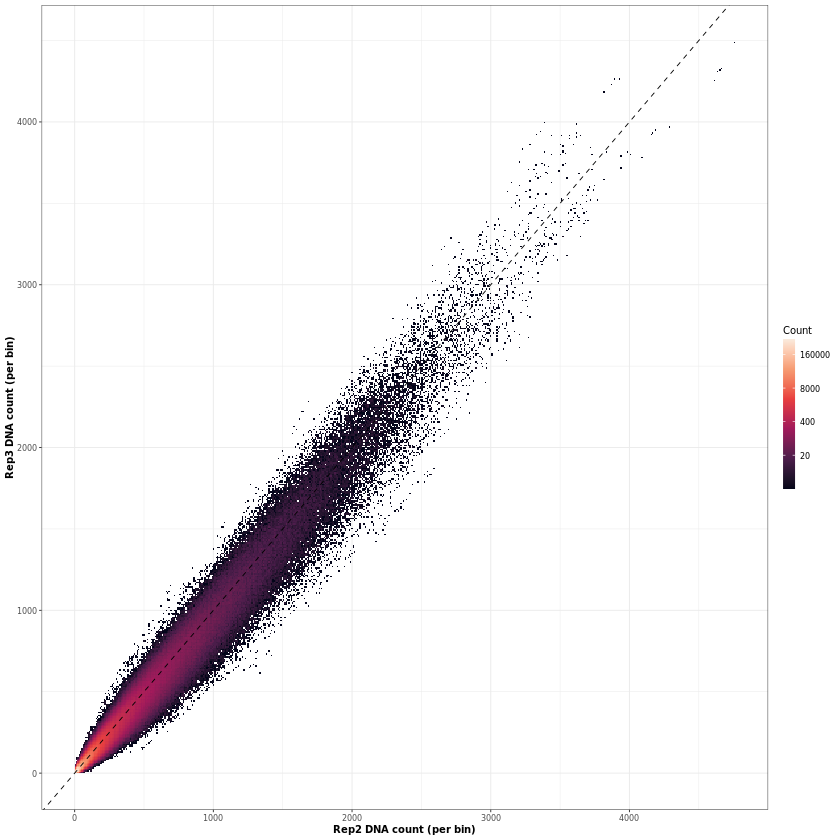

In [27]:
#DNA2 vs DNA3
cor.test(bins_df$DNA2, bins_df$DNA3, method = "spearman")
cor.test(bins_df$DNA2, bins_df$DNA3, method = "pearson")

p <- ggplot(bins_df) +
  geom_bin2d(aes(x=DNA2, y=DNA3), bins = 500) +
  scale_fill_viridis_c(trans = "log", breaks = c(0, 20, 400, 8000, 160000), option = "rocket") +
  geom_abline(mapping=aes(slope=1, intercept=0), colour="black", linetype="dashed", size=0.25) + 
  theme_bw(base_family = "Arial", base_size = 6) + 
  xlab("Rep2 DNA count (per bin)") + 
  ylab("Rep3 DNA count (per bin)") +
  labs(fill = "Count") +
  theme(legend.position = "right", legend.key.height = unit(0.25, units = "in"), 
        legend.key.width = unit(0.1, units = "in"), axis.title = element_text(face = "bold"))

p 

res <- '/data/hodges_lab/ATAC-STARR_B-cells/results/NAR_paper_figures'
ggsave(p, filename = paste0(res, "/corr_D2-D3"), device = cairo_pdf, width = 2, height = 2)

### Donut Chart (no shrink results)

In [1]:
%%bash
# get numbers for donut chart below. I think bins.saf has a header so subtract 1 from the wc -l result. 
wc -l /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_no-counts_no-shrink/bins.saf
wc -l /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_no-counts_no-shrink/active_bins.bed
wc -l /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_no-counts_no-shrink/silent_bins.bed

head /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_no-counts_no-shrink/bins.saf

6209808 /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_no-counts_no-shrink/bins.saf
251895 /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_no-counts_no-shrink/active_bins.bed
339737 /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_no-counts_no-shrink/silent_bins.bed
GeneID	Chr	Start	End	Strand
bin_1	chr1	267896	267945	.
bin_2	chr1	267906	267955	.
bin_3	chr1	267916	267965	.
bin_4	chr1	267926	267975	.
bin_5	chr1	267936	267985	.
bin_6	chr1	267946	267995	.
bin_7	chr1	267956	268005	.
bin_8	chr1	267966	268015	.
bin_9	chr1	267976	268025	.


In [13]:
library(tidyverse)

plotDonut <- function(data){
    # Compute percentages
    data$fraction <- data$count / sum(data$count)

    # Compute the cumulative percentages (top of each rectangle)
    data$ymax <- cumsum(data$fraction)

    # Compute the bottom of each rectangle
    data$ymin <- c(0, head(data$ymax, n=-1))

    # Compute label position
    data$labelPosition <- (data$ymax + data$ymin) / 2

    # Compute a good label
    data$label <- paste0(data$category, "\n value: ", data$count)

    # Make the plot
    p <- ggplot(data, aes(ymax=ymax, ymin=ymin, xmax=4, xmin=3, fill=category)) +
      geom_rect(color = "black") +
      scale_fill_manual(values = c("steelblue", "firebrick", "lightgray")) +
      coord_polar(theta="y") +
      xlim(c(2, 4)) +
      theme_void(base_size = 8) +
      theme(legend.title = element_blank())
    return(p)
}

#make df with groups and values to plot. 
df <- data.frame(
  category = c("Active Bins\n(251,895)","Silent Bins\n(339,737)","Not Significant\n(5,618,175)"),
  count = c(251895,339737,6209807-251895-339737)
)

#make group factored and order for plotting. 
df$category <- factor(df$category, levels = c("Active Bins\n(251,895)","Silent Bins\n(339,737)","Not Significant\n(5,618,175)"))

#Execute function.
p <- plotDonut(data = df)

res_dir <- '/data/hodges_lab/ATAC-STARR_B-cells/results/NAR_paper_figures'
ggsave(p, filename = paste0(res_dir, "/bins_donut.pdf"), device = cairo_pdf, width = 3, height = 3)

In [2]:
%%bash 
#get counts
ChrAcc='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/ChrAcc_peaks/GM12878inGM12878_DNA_genrich_3-replicates_0.0001-qvalue.narrowPeak'
regions_dir='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_no-counts_no-shrink'

wc -l $ChrAcc

bedtools intersect -u -a $ChrAcc -b ${regions_dir}/active_regions.bed | wc -l

bedtools intersect -u -a $ChrAcc -b ${regions_dir}/silent_regions.bed | wc -l

bedtools intersect -u -a $ChrAcc -b ${regions_dir}/active_regions.bed | \
    bedtools intersect -u -a - -b ${regions_dir}/silent_regions.bed | wc -l
    
bedtools intersect -v -a $ChrAcc -b ${regions_dir}/active_regions.bed | \
    bedtools intersect -v -a - -b ${regions_dir}/silent_regions.bed | wc -l
    

101904 /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/ChrAcc_peaks/GM12878inGM12878_DNA_genrich_3-replicates_0.0001-qvalue.narrowPeak
21534
13994
4433
70809


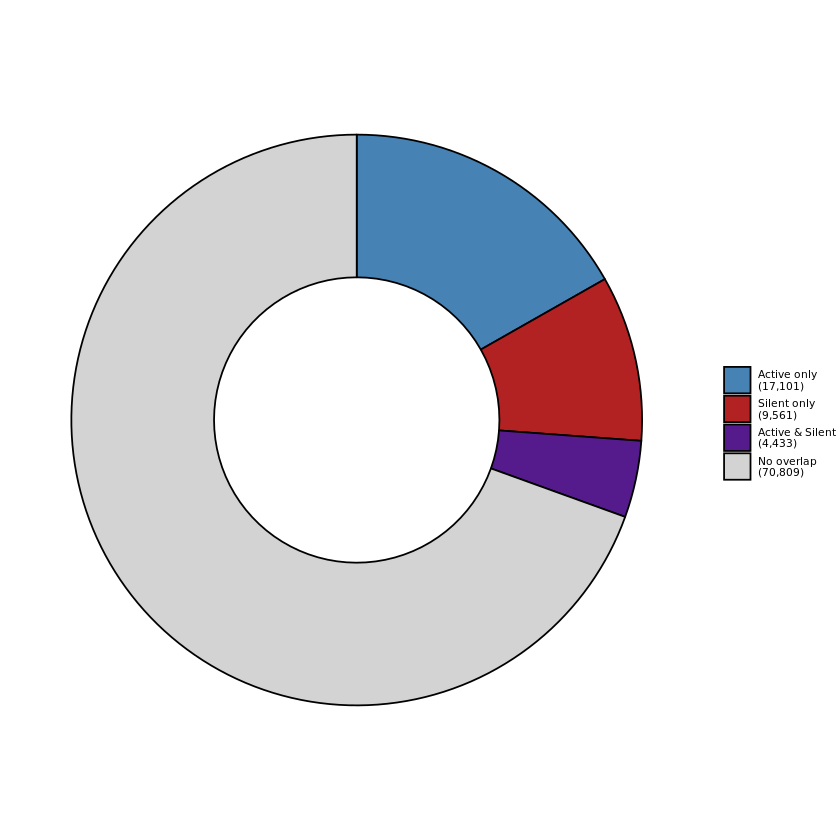

In [6]:
library(tidyverse)

plotDonut <- function(data){
    # Compute percentages
    data$fraction <- data$count / sum(data$count)

    # Compute the cumulative percentages (top of each rectangle)
    data$ymax <- cumsum(data$fraction)

    # Compute the bottom of each rectangle
    data$ymin <- c(0, head(data$ymax, n=-1))

    # Compute label position
    data$labelPosition <- (data$ymax + data$ymin) / 2

    # Compute a good label
    data$label <- paste0(data$category, "\n value: ", data$count)

    # Make the plot
    p <- ggplot(data, aes(ymax=ymax, ymin=ymin, xmax=4, xmin=3, fill=category)) +
      geom_rect(color = "black") +
      scale_fill_manual(values = c("steelblue", "firebrick", "purple4","lightgray")) +
      coord_polar(theta="y") +
      xlim(c(2, 4)) +
      theme_void(base_size = 8) +
      theme(legend.title = element_blank())
    return(p)
}
#make df with groups and values to plot. 
df <- data.frame(
  category = c("Active only\n(17,101)","Silent only\n(9,561)","Active & Silent\n(4,433)","No overlap\n(70,809)"),
  count = c(21534-4433,13994-4433,4433,70809)
)

#make group factored and order for plotting. 
df$category <- factor(df$category, levels = c("Active only\n(17,101)","Silent only\n(9,561)","Active & Silent\n(4,433)","No overlap\n(70,809)"))

#Execute function.
p <- plotDonut(data = df)
p

res_dir <- '/data/hodges_lab/ATAC-STARR_B-cells/results/NAR_paper_figures'
ggsave(p, filename = paste0(res_dir, "/peaks_donut.pdf"), device = cairo_pdf, width = 3, height = 3)

### Bar Chart of Region Counts (no shrink results)

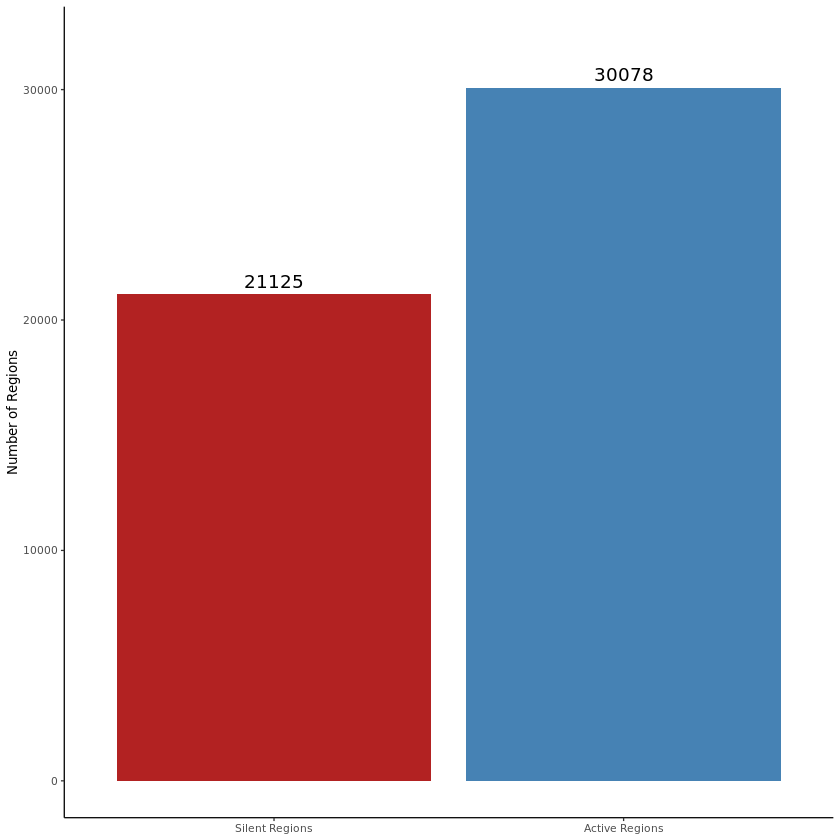

In [10]:
df <- data.frame(Group = c("Silent Regions", "Active Regions"),
  value = c(21125, 30078))

df$Group <- factor(df$Group, levels = c("Silent Regions", "Active Regions"))

p <- ggplot(df, aes(x=Group, y=value, fill = Group)) +
  geom_col() +
  geom_text(aes(label = value), vjust = -0.5) +
  theme_classic(base_size = 8) + 
  ylab("Number of Regions") +
  scale_fill_manual(values = c("firebrick", "steelblue")) +
  theme(legend.position = "none", axis.title.x = element_blank()) +
  coord_cartesian(ylim = c(0, 32000))
p
res_dir <- '/data/hodges_lab/ATAC-STARR_B-cells/results/NAR_paper_figures'
ggsave(p, filename = paste0(res_dir, "/region_number_bar.pdf"), device = cairo_pdf, width = 3, height = 3)

### Regulatory region size distribution (no shrink results)


── Column specification ────────────────────────────────────────────────────────
cols(
  Chr = col_character(),
  Start = col_double(),
  End = col_double(),
  name = col_character(),
  score = col_double(),
  strand = col_character()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  Chr = col_character(),
  Start = col_double(),
  End = col_double(),
  name = col_character(),
  score = col_double(),
  strand = col_character()
)




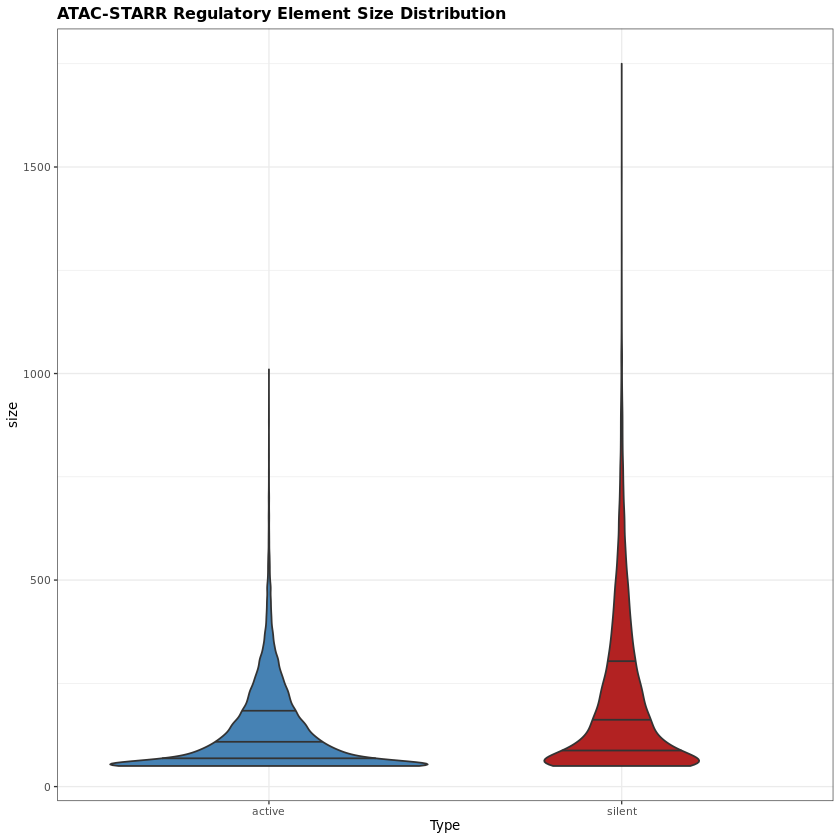

In [4]:
library(tidyverse)

active <- read_tsv("/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_no-counts_no-shrink/active_regions.bed", 
                   col_names = c("Chr", "Start", "End", "name", "score", "strand")) %>% mutate(size = End-Start, Type = "active")

silent <- read_tsv("/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_no-counts_no-shrink/silent_regions.bed", 
                   col_names = c("Chr", "Start", "End", "name", "score", "strand")) %>% mutate(size = End-Start, Type = "silent")

all <- bind_rows(active, silent)

p <- ggplot(all, aes(y=size, x=Type, fill=Type)) +
  geom_violin(draw_quantiles = c(0.25, 0.5, 0.75)) +
  theme_bw(base_size = 8) + 
  ggtitle("ATAC-STARR Regulatory Element Size Distribution") +
  scale_fill_manual(values = c("steelblue", "firebrick")) +
  theme(legend.position = "none", plot.title = element_text(face="bold"))

p

In [6]:
res <- '/data/hodges_lab/ATAC-STARR_B-cells/results/NAR_paper_figures'
ggsave(p, filename = paste0(res, "/regulatory-regions_size_distribution.pdf"), device = cairo_pdf, height = 3, width = 2)

## Compare to fragment group method

### ATAC-STARR 

In [1]:
%%bash

#Function: create_FGs [INPUT_FILE] [OUTPUT_FILE]
create_FGs () {
    #variables
    INPUT_FILE=$1 
    OUTPUT_FILE=$2
    
    ### OPERATION ###
    # This operation is one very long pipe. The comments below explain each step of the process. . 
    # 1. Convert mapped read pairs (input file) to bedpe file format.
    # 2. Use awk to print the coordinates of the sequenced fragment.
    # 3. Sort by chr location and remove duplicates with sort -u.
    # 4. Create synthetic fragment groups from the bed-formated sequence fragments that overlap by 75%. Use the fraction-both setting, which requires both sequence fragments to overlap each other by 75% rather than only one. 
    # 5. Remove fragment groups that are created using less than 10 sequence fragments (awk filters by member, the cut removes the first column, which reports the number of members per fragment group, uniq just ensures all regions are unique and there are no duplicates).
    # 6. Convert to a gff file format and write to output file.
    bedtools bamtobed -i $INPUT_FILE -bedpe | awk 'BEGIN{FS=OFS="\t"} {print $1,$2,$6,$9,$7}' - \
        | sort -k1,1 -k2,2n -k3,3n -u - | bedmap --count --echo-map-range --fraction-both 0.75 --delim '\t' - \
        | awk '$1>=10' - | cut -f2- - | sort -k1,1 -k2,2n -k3,3n - | uniq - \
        | awk 'BEGIN {OFS=FS="\t"}{print $1,"curated","accessible_region",$2,$3,".",".",".","Peak_ID=Peak_"NR}' - \
        > $OUTPUT_FILE
}
#################
#Variables
INPUT='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/merged_replicates/GM12878inGM12878_DNA_merged.filtered.n-sorted.bam'
OUTPUT_DIR='/data/hodges_lab/ATAC-STARR_B-cells/results/bins_vs_fragment-groups' 

mkdir $OUTPUT_DIR

#GMinGM
create_FGs $INPUT ${OUTPUT_DIR}/GM12878_fragment-groups.gff

*****WARNING: Query A00252:145:HHCLYDSXY:1:1105:3034:25222 is marked as paired, but its mate does not occur next to it in your BAM file.  Skipping. 
*****WARNING: Query A00252:145:HHCLYDSXY:1:1110:24126:9173 is marked as paired, but its mate does not occur next to it in your BAM file.  Skipping. 
*****WARNING: Query A00252:145:HHCLYDSXY:1:1116:12852:23437 is marked as paired, but its mate does not occur next to it in your BAM file.  Skipping. 
*****WARNING: Query A00252:145:HHCLYDSXY:1:1117:23701:17769 is marked as paired, but its mate does not occur next to it in your BAM file.  Skipping. 
*****WARNING: Query A00252:145:HHCLYDSXY:1:1121:19217:13385 is marked as paired, but its mate does not occur next to it in your BAM file.  Skipping. 
*****WARNING: Query A00252:145:HHCLYDSXY:1:1153:7681:9126 is marked as paired, but its mate does not occur next to it in your BAM file.  Skipping. 
*****WARNING: Query A00252:145:HHCLYDSXY:1:1220:7789:35117 is marked as paired, but its mate does not oc

In [1]:
%%bash
#Define path variables.
BAMS='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates'
OUTPUT_DIR='/data/hodges_lab/ATAC-STARR_B-cells/results/bins_vs_fragment-groups'
GENOME_FA='/data/hodges_lab/hg38_genome/hg38.fa'

featureCounts -p -B -O --minOverlap 1 -T 8 -F GTF -t accessible_region -g Peak_ID -G $GENOME_FA \
    -a ${OUTPUT_DIR}/GM12878_fragment-groups.gff  \
    -o ${OUTPUT_DIR}/GM12878_FG-method_counts.tsv \
    ${BAMS}/GM12878inGM12878_DNA_Rep1.filtered.pos-sorted.bam \
    ${BAMS}/GM12878inGM12878_DNA_Rep2.filtered.pos-sorted.bam \
    ${BAMS}/GM12878inGM12878_DNA_Rep3.filtered.pos-sorted.bam \
    ${BAMS}/GM12878inGM12878_RNA_Rep1.filtered.pos-sorted.bam \
    ${BAMS}/GM12878inGM12878_RNA_Rep2.filtered.pos-sorted.bam \
    ${BAMS}/GM12878inGM12878_RNA_Rep3.filtered.pos-sorted.bam


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v2.0.1

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 6 BAM files                                      ||
||                           o GM12878inGM12878_DNA_Rep1.filtered.pos-sor ... ||
||                           o GM12878inGM12878_DNA_Rep2.filtered.pos-sor ... ||
||                           o GM12878inGM12878_DNA_Rep3.filtered.pos-sor ... ||
||                           o GM12878inGM12878_RNA_Rep1.filtered

In [1]:
%%bash

OUTPUT_DIR='/data/hodges_lab/ATAC-STARR_B-cells/results/bins_vs_fragment-groups'

mkdir ${OUTPUT_DIR}/FG_DESeq-output

cd /data/hodges_lab/ATAC-STARR_B-cells/bin/activity_analysis/call_active_peaks

#Call R script
Rscript RNA-to-DNA_differential-analysis.r --counts ${OUTPUT_DIR}/GM12878_FG-method_counts.tsv \
    --num_reps 3 --cores 8 --FDR 0.1 --out_dir ${OUTPUT_DIR}/FG_DESeq-output

mkdir: cannot create directory ‘/data/hodges_lab/ATAC-STARR_B-cells/results/bins_vs_fragment-groups/FG_DESeq-output’: File exists

── Column specification ────────────────────────────────────────────────────────
cols(
  Bin_ID = col_character(),
  Chr = col_character(),
  Start = col_double(),
  End = col_double(),
  Strand = col_character(),
  Length = col_double(),
  DNA1 = col_double(),
  DNA2 = col_double(),
  DNA3 = col_double(),
  RNA1 = col_double(),
  RNA2 = col_double(),
  RNA3 = col_double()
)

converting counts to integer mode
Warning message:
In DESeqDataSet(se, design = design, ignoreRank) :
  some variables in design formula are characters, converting to factors
estimating size factors
estimating dispersions
gene-wise dispersion estimates: 8 workers
mean-dispersion relationship
final dispersion estimates, fitting model and testing: 8 workers


In [2]:
%%bash

OUTPUT_DIR='/data/hodges_lab/ATAC-STARR_B-cells/results/bins_vs_fragment-groups'

#active
bedtools merge -i ${OUTPUT_DIR}/FG_DESeq-output/active_bins.bed | wc -l 
    bedtools merge -c 5 -o mean -i ${OUTPUT_DIR}/FG_DESeq-output/active_bins.bed | \
    sort -k1,1 -k2,2n - > ${OUTPUT_DIR}/FG_DESeq-output/active_regions.bed 
    
#silent
bedtools merge -i ${OUTPUT_DIR}/FG_DESeq-output/silent_bins.bed | wc -l 
    bedtools merge -c 5 -o mean -i ${OUTPUT_DIR}/FG_DESeq-output/silent_bins.bed | \
    sort -k1,1 -k2,2n - > ${OUTPUT_DIR}/FG_DESeq-output/silent_regions.bed 

20496
12582


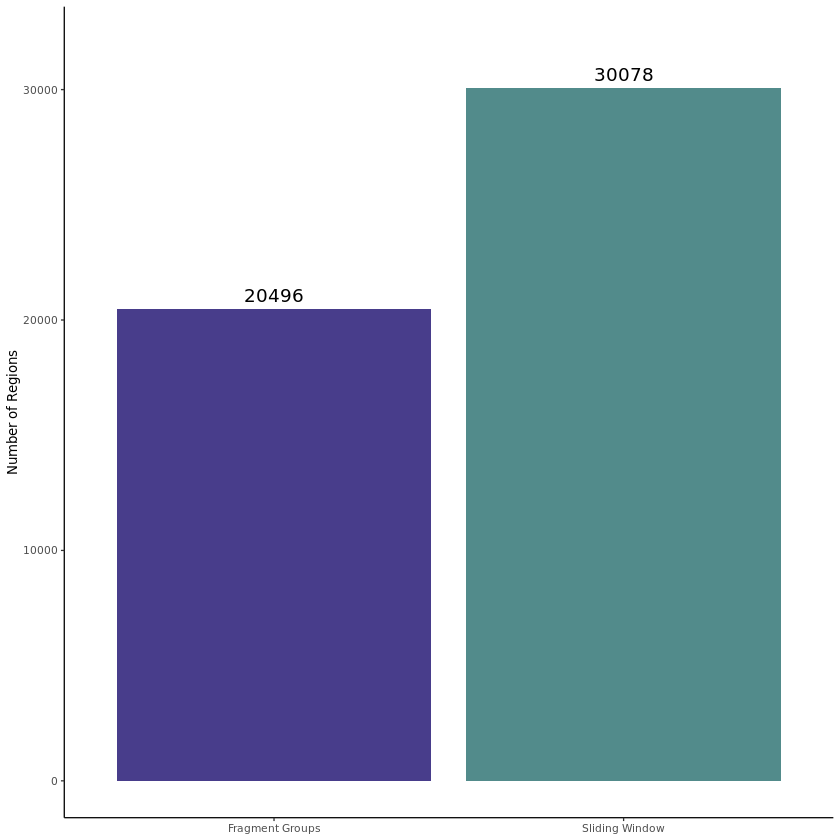

In [7]:
library(ggplot2)

df <- data.frame(Group = c("Fragment Groups", "Sliding Window"),
  value = c(20496, 30078))

df$Group <- factor(df$Group, levels = c("Fragment Groups", "Sliding Window"))

p <- ggplot(df, aes(x=Group, y=value, fill = Group)) +
  geom_col() +
  geom_text(aes(label = value), vjust = -0.5) +
  theme_classic(base_size = 8) + 
  ylab("Number of Regions") +
  scale_fill_manual(values = c("darkslateblue", "darkslategray4")) +
  theme(legend.position = "none", axis.title.x = element_blank()) +
  coord_cartesian(ylim = c(0, 32000))
p

res_dir <- '/data/hodges_lab/ATAC-STARR_B-cells/results/NAR_paper_figures'
ggsave(p, filename = paste0(res_dir, "/FG_bar.pdf"), device = cairo_pdf, width = 3, height = 3)

In [1]:
%%bash
#How does this compare to hiDRA regions?
AS="/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_no-counts_no-shrink"
OUTPUT_DIR='/data/hodges_lab/ATAC-STARR_B-cells/results/bins_vs_fragment-groups'

wc -l ${AS}/active_regions.bed
wc -l ${OUTPUT_DIR}/FG_DESeq-output/active_regions.bed 

bedtools jaccard -a ${OUTPUT_DIR}/FG_DESeq-output/active_regions.bed -b ${AS}/active_regions.bed

30078 /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_no-counts_no-shrink/active_regions.bed
20496 /data/hodges_lab/ATAC-STARR_B-cells/results/bins_vs_fragment-groups/FG_DESeq-output/active_regions.bed
intersection	union	jaccard	n_intersections
2811082	11264711	0.249548	19460


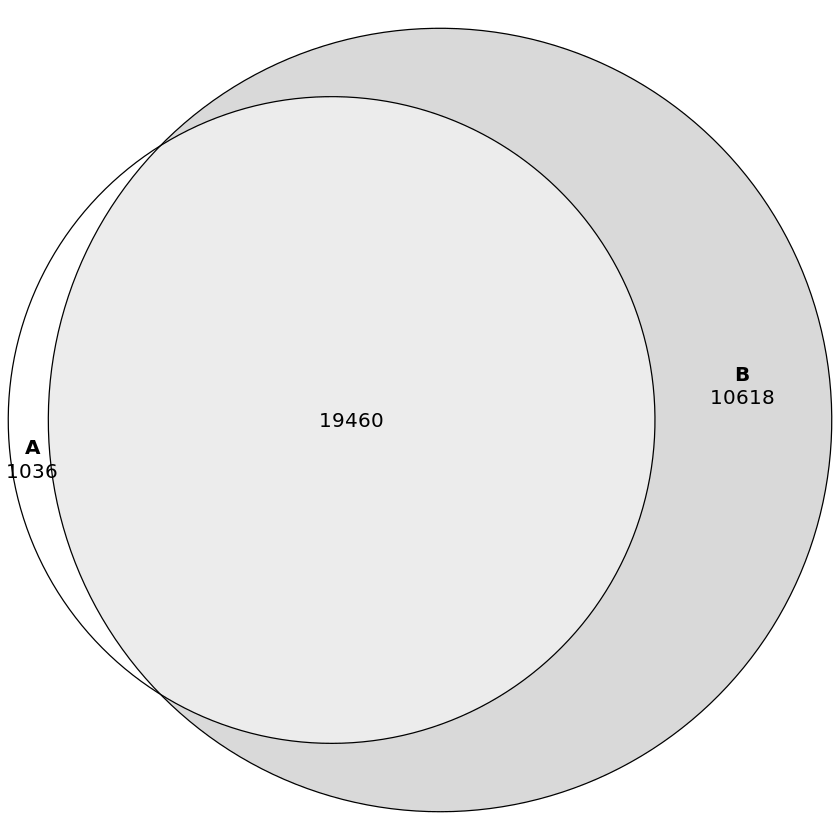

In [2]:
#make euler plot with values above. 
library(tidyverse)
library(eulerr)

#set names to variables
A_name <- "`FG`"
B_name <- "`SW`"

#set values to variables:
A <- 20496
B <- 30078
A_B <- 19460

#make named list using variables above. This shouldn't change for all 3-way comparisons. 
combo <- c(A = A-A_B, B = B-A_B, 
           `A&B` = A_B)

eul <- plot(euler(combo), quantities = TRUE) 
eul

#save and edit in illustrator. 
dir <- '/data/hodges_lab/ATAC-STARR_B-cells/results/NAR_paper_figures'
ggsave(plot = eul, paste0(dir,"/euler-plot_FGs-vs-SW.pdf"), width = 3, height = 3)

In [1]:
%%bash
#How does this compare to hiDRA regions?
hiDRA="/data/hodges_lab/public_data/GM12878/obtained_as_raw_files/hiDRA_GM12878_2018-kellis"
OUTPUT_DIR='/data/hodges_lab/ATAC-STARR_B-cells/results/bins_vs_fragment-groups'

wc -l ${hiDRA}/hiDRA_active_regions.hg38.sort.bed
wc -l ${OUTPUT_DIR}/FG_DESeq-output/active_regions.bed 

bedtools jaccard -a ${OUTPUT_DIR}/FG_DESeq-output/active_regions.bed -b ${hiDRA}/hiDRA_active_regions.hg38.sort.bed

66238 /data/hodges_lab/public_data/GM12878/obtained_as_raw_files/hiDRA_GM12878_2018-kellis/hiDRA_active_regions.hg38.sort.bed
20496 /data/hodges_lab/ATAC-STARR_B-cells/results/bins_vs_fragment-groups/FG_DESeq-output/active_regions.bed
intersection	union	jaccard	n_intersections
3340182	29961826	0.111481	9858


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



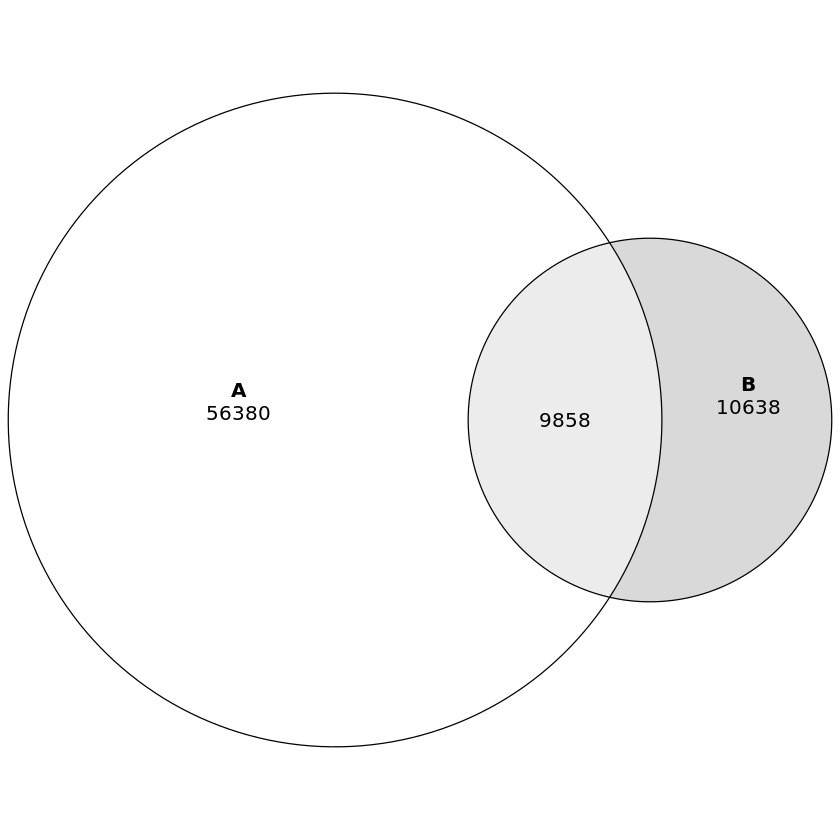

In [1]:
#make euler plot with values above. 
library(tidyverse)
library(eulerr)

#set names to variables
A_name <- "`Wang Active`"
B_name <- "`FG Active Regions`"

#set values to variables:
A <- 66238
B <- 20496
A_B <- 9858

#make named list using variables above. This shouldn't change for all 3-way comparisons. 
combo <- c(A = A-A_B, B = B-A_B, 
           `A&B` = A_B)

eul <- plot(euler(combo), quantities = TRUE) 
eul

#save and edit in illustrator. 
dir <- '/data/hodges_lab/ATAC-STARR_B-cells/results/hidra-vs-AS_active-regions'
ggsave(plot = eul, paste0(dir,"/euler-plot_FGs-vs-hidra.pdf"), width = 3, height = 3)

## Compare without duplicates

In [3]:
%%bash
PEAKS='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/ChrAcc_peaks/GM12878inGM12878_DNA_genrich_3-replicates_0.0001-qvalue.narrowPeak'
BAMS='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates'
OUT_DIR='/data/hodges_lab/ATAC-STARR_B-cells/results/without_duplicates'

#setup
mkdir $OUT_DIR
cd /data/hodges_lab/ATAC-STARR_B-cells/bin/activity_analysis/call_active_peaks

#Try again, but with setting FDR at 0.1:
#GG_3-replicates_0.1 q-value
python3 call_ATAC-STARR_regulatory-regions.py -i $PEAKS -o $OUT_DIR -q 0.1 \
    -d ${BAMS}/GM12878inGM12878_DNA_Rep1.unique.n-sorted.bam \
    ${BAMS}/GM12878inGM12878_DNA_Rep2.unique.n-sorted.bam \
    ${BAMS}/GM12878inGM12878_DNA_Rep3.unique.n-sorted.bam \
    -r ${BAMS}/GM12878inGM12878_RNA_Rep1.unique.n-sorted.bam \
    ${BAMS}/GM12878inGM12878_RNA_Rep2.unique.n-sorted.bam \
    ${BAMS}/GM12878inGM12878_RNA_Rep3.unique.n-sorted.bam

PARAMETERS:
ChrAcc Peaks File: /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/ChrAcc_peaks/GM12878inGM12878_DNA_genrich_3-replicates_0.0001-qvalue.narrowPeak
DNA Files: /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates/GM12878inGM12878_DNA_Rep1.unique.n-sorted.bam /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates/GM12878inGM12878_DNA_Rep2.unique.n-sorted.bam /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates/GM12878inGM12878_DNA_Rep3.unique.n-sorted.bam
RNA Files: /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates/GM12878inGM12878_RNA_Rep1.unique.n-sorted.bam /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates/GM12878inGM12878_RNA_Rep2.unique.n-sorted.bam /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates/GM12878inGM12878_RNA_Rep3.unique.n-sorted.bam
Output Directory: /data/hodges_lab/ATAC-STARR_B-cells/results/wit


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v2.0.1

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 6 BAM files                                      ||
||                           o GM12878inGM12878_DNA_Rep1.unique.n-sorted.bam  ||
||                           o GM12878inGM12878_DNA_Rep2.unique.n-sorted.bam  ||
||                           o GM12878inGM12878_DNA_Rep3.unique.n-sorted.bam  ||
||                           o GM12878inGM12878_RNA_Rep1.unique.n

In [4]:
%%bash
wc -l /data/hodges_lab/ATAC-STARR_B-cells/results/without_duplicates/active_regions.bed
wc -l /data/hodges_lab/ATAC-STARR_B-cells/results/without_duplicates/silent_regions.bed

8915 /data/hodges_lab/ATAC-STARR_B-cells/results/without_duplicates/active_regions.bed
14006 /data/hodges_lab/ATAC-STARR_B-cells/results/without_duplicates/silent_regions.bed


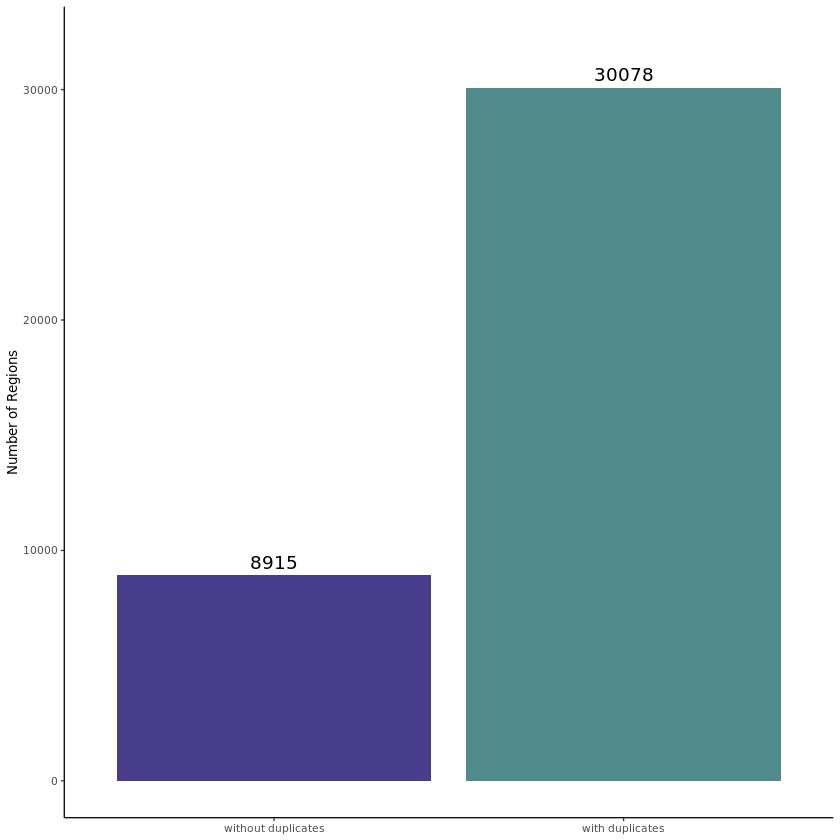

In [1]:
library(ggplot2)

df <- data.frame(Group = c("without duplicates", "with duplicates"),
  value = c(8915, 30078))

df$Group <- factor(df$Group, levels = c("without duplicates", "with duplicates"))

p <- ggplot(df, aes(x=Group, y=value, fill = Group)) +
  geom_col() +
  geom_text(aes(label = value), vjust = -0.5) +
  theme_classic(base_size = 8) + 
  ylab("Number of Regions") +
  scale_fill_manual(values = c("darkslateblue", "darkslategray4")) +
  theme(legend.position = "none", axis.title.x = element_blank()) +
  coord_cartesian(ylim = c(0, 32000))
p

res_dir <- '/data/hodges_lab/ATAC-STARR_B-cells/results/NAR_paper_figures'
ggsave(p, filename = paste0(res_dir, "/without_dups_bar.pdf"), device = cairo_pdf, width = 3, height = 3)

In [2]:
%%bash
#How does this compare to hiDRA regions?
AS="/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_no-counts_no-shrink"

wc -l ${AS}/active_regions.bed
wc -l /data/hodges_lab/ATAC-STARR_B-cells/results/without_duplicates/active_regions.bed

bedtools jaccard -a ${AS}/active_regions.bed \
-b /data/hodges_lab/ATAC-STARR_B-cells/results/without_duplicates/active_regions.bed

30078 /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_no-counts_no-shrink/active_regions.bed
8915 /data/hodges_lab/ATAC-STARR_B-cells/results/without_duplicates/active_regions.bed
intersection	union	jaccard	n_intersections
819670	4316970	0.189872	6468


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



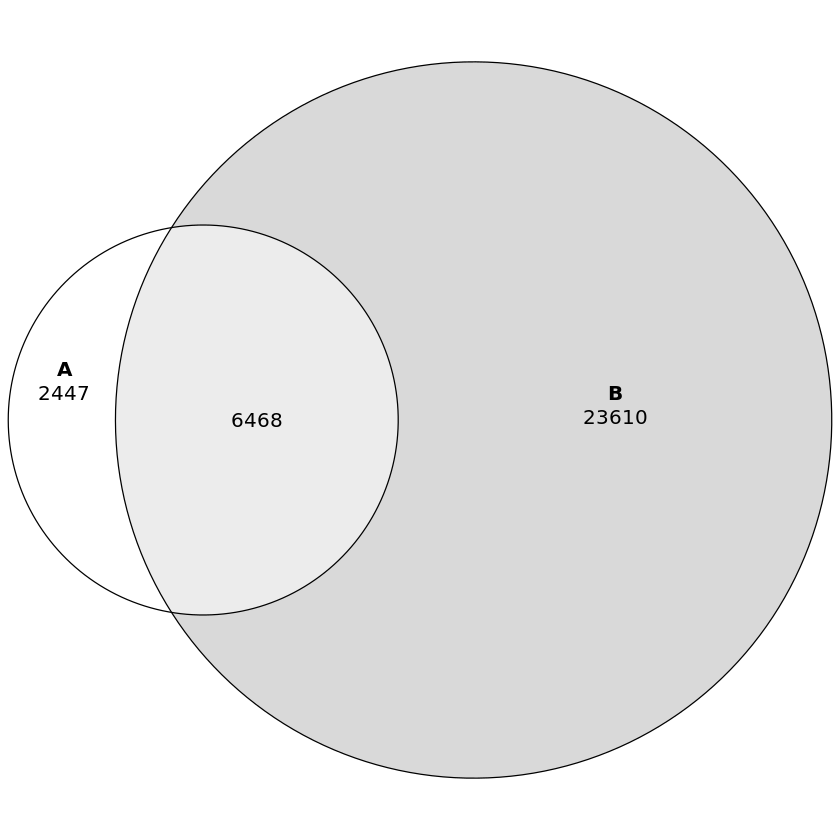

In [1]:
#make euler plot with values above. 
library(tidyverse)
library(eulerr)

#set names to variables
A_name <- "`FG`"
B_name <- "`SW`"

#set values to variables:
A <- 8915
B <- 30078
A_B <- 6468

#make named list using variables above. This shouldn't change for all 3-way comparisons. 
combo <- c(A = A-A_B, B = B-A_B, 
           `A&B` = A_B)

eul <- plot(euler(combo), quantities = TRUE) 
eul

#save and edit in illustrator. 
dir <- '/data/hodges_lab/ATAC-STARR_B-cells/results/NAR_paper_figures'
ggsave(plot = eul, paste0(dir,"/euler-plot_dups.pdf"), width = 3, height = 3)

### Correlation plots

In [1]:
#Investigate the counts to understand the volcano plot.
#setup
library(tidyverse)
library(DESeq2)
load("/data/hodges_lab/ATAC-STARR_B-cells/results/without_duplicates/res.Rdata")
res_df <- as.data.frame(res) %>% rownames_to_column(var = "Bin_ID")
load("/data/hodges_lab/ATAC-STARR_B-cells/results/without_duplicates/dds.Rdata")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The follow

In [2]:
#extract normalized counts
cts_df <- counts(dds, normalized=TRUE) %>% as.data.frame() %>% rownames_to_column(var = "Bin_ID")

#join all bins with their counts. 
bins_df <- inner_join(res_df, cts_df, by = "Bin_ID")

head(bins_df)

,Bin_ID,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,DNA1,DNA2,DNA3,RNA1,RNA2,RNA3
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,bin_1,2.345383,-1.05754739,1.0282172,-1.0285253,0.3037028,NA,3.168349,2.991748,3.281746,1.255119,1.771798,1.603539
2,bin_2,3.292483,-0.65234863,0.8399734,-0.7766301,0.4373771,NA,3.802018,3.739685,4.375661,1.255119,1.771798,4.810618
3,bin_3,5.388811,-0.23872638,0.6359995,-0.3753562,0.7073955,NA,5.703027,5.983496,6.016534,6.275597,3.543596,4.810618
4,bin_4,7.314978,-0.15544494,0.5481217,-0.2835957,0.7767203,NA,8.237706,7.479370,7.657407,8.785835,5.315394,6.414158
5,bin_5,9.317399,-0.09816494,0.4879440,-0.2011807,0.8405572,0.9738342,8.871376,9.723181,10.392196,10.040955,8.858990,8.017697
6,bin_6,9.978198,-0.13562149,0.4732368,-0.2865827,0.7744319,0.9600947,10.138715,9.723181,11.486111,10.040955,8.858990,9.621236


Warning message in cor.test.default(bins_df$RNA1, bins_df$RNA2, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  bins_df$RNA1 and bins_df$RNA2
S = 4.5383e+18, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.8726459 



	Pearson's product-moment correlation

data:  bins_df$RNA1 and bins_df$RNA2
t = 13988, df = 5979649, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9850368 0.9850843
sample estimates:
      cor 
0.9850606 


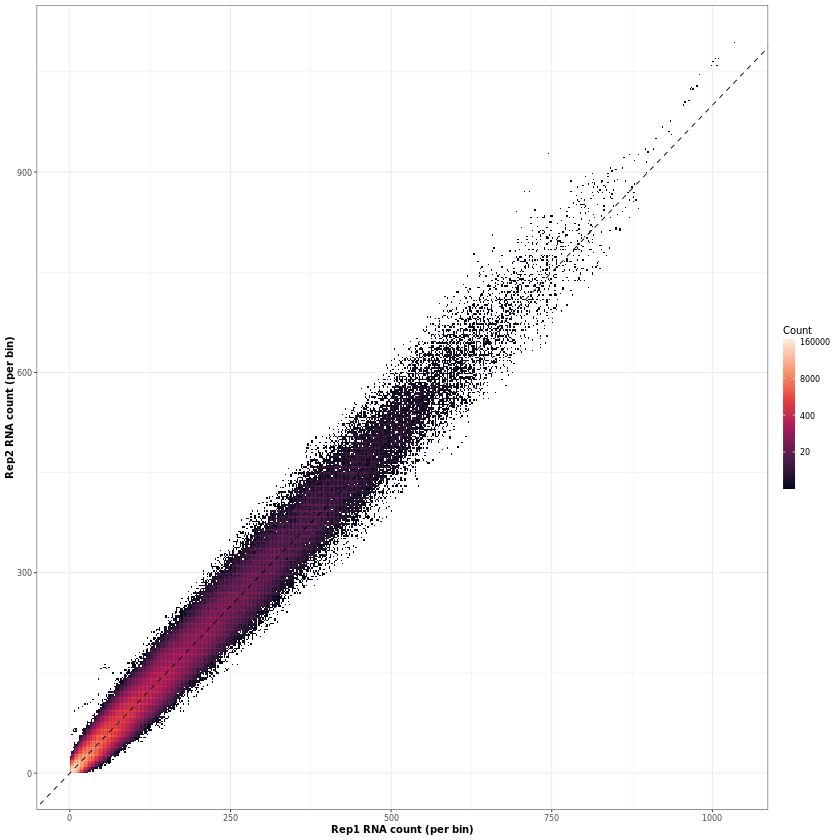

In [3]:
#RNA1 vs RNA2
cor.test(bins_df$RNA1, bins_df$RNA2, method = "spearman")
cor.test(bins_df$RNA1, bins_df$RNA2, method = "pearson")

p <- ggplot(bins_df) +
  geom_bin2d(aes(x=RNA1, y=RNA2), bins = 500) +
  scale_fill_viridis_c(trans = "log", breaks = c(0, 20, 400, 8000, 160000), option = "rocket") +
  geom_abline(mapping=aes(slope=1, intercept=0), colour="black", linetype="dashed", size=0.25) + 
  theme_bw(base_family = "Arial", base_size = 6) + 
  xlab("Rep1 RNA count (per bin)") + 
  ylab("Rep2 RNA count (per bin)") +
  labs(fill = "Count") +
  theme(legend.position = "right", legend.key.height = unit(0.25, units = "in"), 
        legend.key.width = unit(0.1, units = "in"), axis.title = element_text(face = "bold"))
p 

res <- '/data/hodges_lab/ATAC-STARR_B-cells/results/NAR_paper_figures'
ggsave(p, filename = paste0(res, "/unique_corr_R1-R2.pdf"), device = cairo_pdf, width = 2, height = 2)

Warning message in cor.test.default(bins_df$RNA1, bins_df$RNA3, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  bins_df$RNA1 and bins_df$RNA3
S = 4.5719e+18, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.8717023 



	Pearson's product-moment correlation

data:  bins_df$RNA1 and bins_df$RNA3
t = 11804, df = 5979649, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9791759 0.9792419
sample estimates:
      cor 
0.9792089 


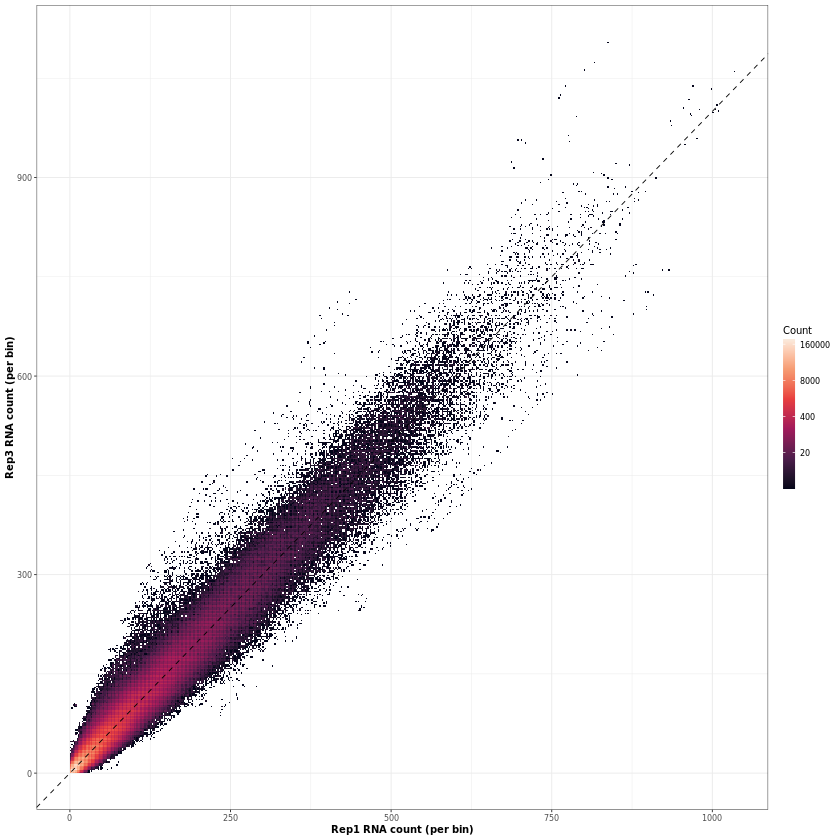

In [4]:
#RNA1 vs RNA3
cor.test(bins_df$RNA1, bins_df$RNA3, method = "spearman")
cor.test(bins_df$RNA1, bins_df$RNA3, method = "pearson")

p <- ggplot(bins_df) +
  geom_bin2d(aes(x=RNA1, y=RNA3), bins = 500) +
  scale_fill_viridis_c(trans = "log", breaks = c(0, 20, 400, 8000, 160000), option = "rocket") +
  geom_abline(mapping=aes(slope=1, intercept=0), colour="black", linetype="dashed", size=0.25) + 
  theme_bw(base_family = "Arial", base_size = 6) + 
  xlab("Rep1 RNA count (per bin)") + 
  ylab("Rep3 RNA count (per bin)") +
  labs(fill = "Count") +
  theme(legend.position = "right", legend.key.height = unit(0.25, units = "in"), 
        legend.key.width = unit(0.1, units = "in"), axis.title = element_text(face = "bold"))

p 

res <- '/data/hodges_lab/ATAC-STARR_B-cells/results/NAR_paper_figures'
ggsave(p, filename = paste0(res, "/unique_corr_R1-R3.pdf"), device = cairo_pdf, width = 2, height = 2)

Warning message in cor.test.default(bins_df$RNA2, bins_df$RNA3, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  bins_df$RNA2 and bins_df$RNA3
S = 5.2048e+18, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.8539402 



	Pearson's product-moment correlation

data:  bins_df$RNA2 and bins_df$RNA3
t = 11429, df = 5979649, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9778346 0.9779048
sample estimates:
      cor 
0.9778697 


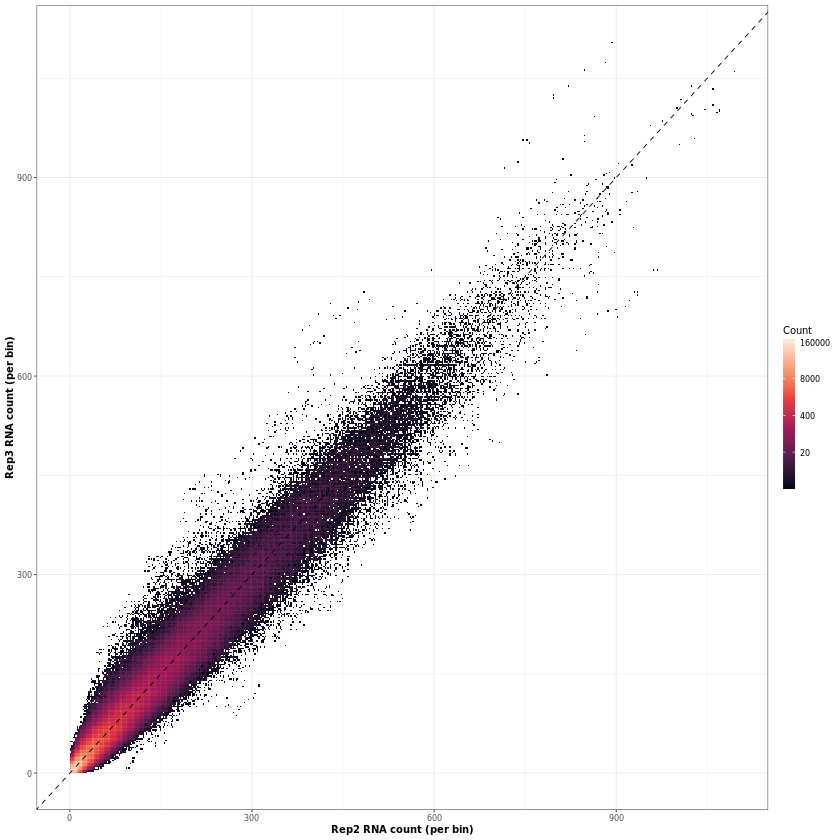

In [5]:
#RNA2 vs RNA3
cor.test(bins_df$RNA2, bins_df$RNA3, method = "spearman")
cor.test(bins_df$RNA2, bins_df$RNA3, method = "pearson")

p <- ggplot(bins_df) +
  geom_bin2d(aes(x=RNA2, y=RNA3), bins = 500) +
  scale_fill_viridis_c(trans = "log", breaks = c(0, 20, 400, 8000, 160000), option = "rocket") +
  geom_abline(mapping=aes(slope=1, intercept=0), colour="black", linetype="dashed", size=0.25) + 
  theme_bw(base_family = "Arial", base_size = 6) + 
  xlab("Rep2 RNA count (per bin)") + 
  ylab("Rep3 RNA count (per bin)") +
  labs(fill = "Count") +
  theme(legend.position = "right", legend.key.height = unit(0.25, units = "in"), 
        legend.key.width = unit(0.1, units = "in"), axis.title = element_text(face = "bold"))

p 

res <- '/data/hodges_lab/ATAC-STARR_B-cells/results/NAR_paper_figures'
ggsave(p, filename = paste0(res, "/unique_corr_R2-R3.pdf"), device = cairo_pdf, width = 2, height = 2)

Warning message in cor.test.default(bins_df$DNA1, bins_df$DNA2, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  bins_df$DNA1 and bins_df$DNA2
S = 2.2092e+18, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.9380036 



	Pearson's product-moment correlation

data:  bins_df$DNA1 and bins_df$DNA2
t = 23102, df = 5979649, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9944359 0.9944537
sample estimates:
      cor 
0.9944448 


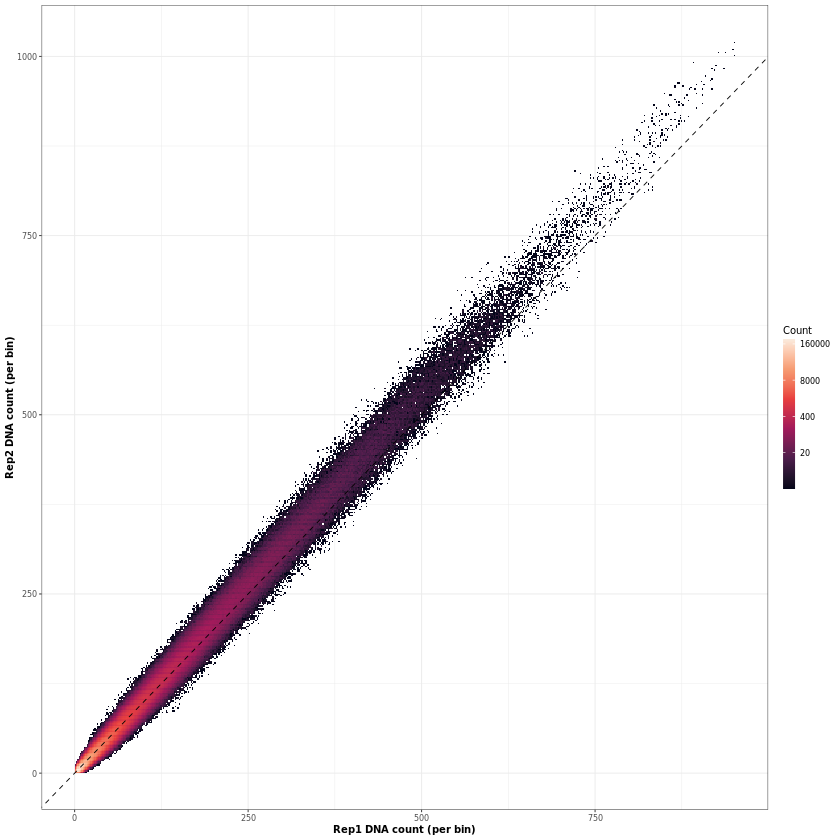

In [6]:
#DNA1 vs DNA2
cor.test(bins_df$DNA1, bins_df$DNA2, method = "spearman")
cor.test(bins_df$DNA1, bins_df$DNA2, method = "pearson")

p <- ggplot(bins_df) +
  geom_bin2d(aes(x=DNA1, y=DNA2), bins = 500) +
  scale_fill_viridis_c(trans = "log", breaks = c(0, 20, 400, 8000, 160000), option = "rocket") +
  geom_abline(mapping=aes(slope=1, intercept=0), colour="black", linetype="dashed", size=0.25) + 
  theme_bw(base_family = "Arial", base_size = 6) + 
  xlab("Rep1 DNA count (per bin)") + 
  ylab("Rep2 DNA count (per bin)") +
  labs(fill = "Count") +
  theme(legend.position = "right", legend.key.height = unit(0.25, units = "in"), 
        legend.key.width = unit(0.1, units = "in"), axis.title = element_text(face = "bold"))

p 

res <- '/data/hodges_lab/ATAC-STARR_B-cells/results/NAR_paper_figures'
ggsave(p, filename = paste0(res, "/unique_corr_D1-D2.pdf"), device = cairo_pdf, width = 2, height = 2)

Warning message in cor.test.default(bins_df$DNA1, bins_df$DNA3, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  bins_df$DNA1 and bins_df$DNA3
S = 2.3391e+18, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.9343604 



	Pearson's product-moment correlation

data:  bins_df$DNA1 and bins_df$DNA3
t = 15962, df = 5979649, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9884498 0.9884865
sample estimates:
      cor 
0.9884682 


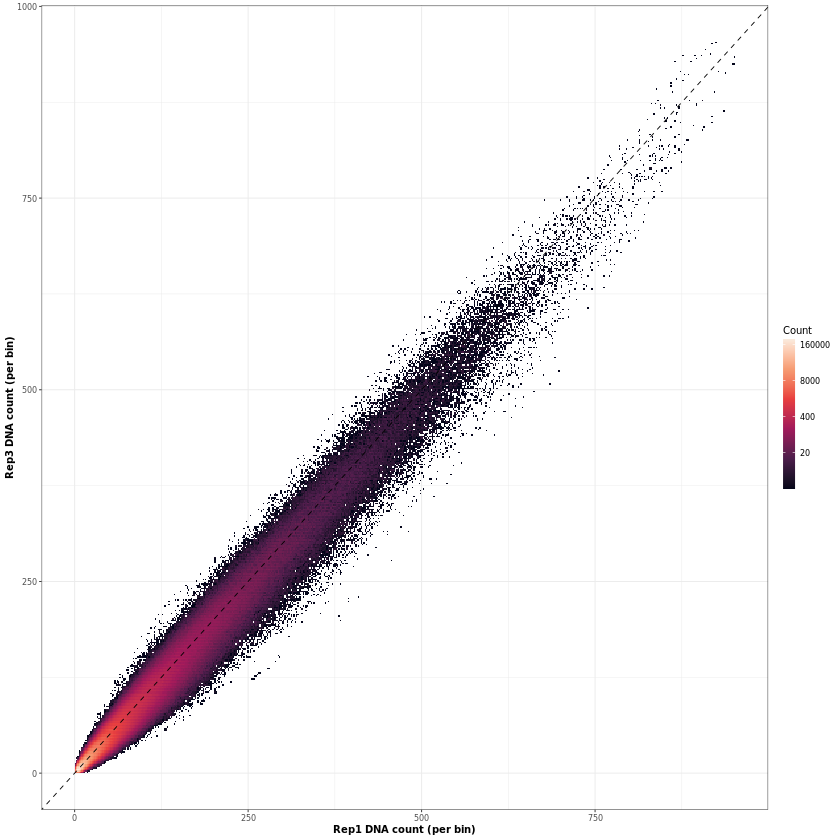

In [7]:
#DNA1 vs DNA3
cor.test(bins_df$DNA1, bins_df$DNA3, method = "spearman")
cor.test(bins_df$DNA1, bins_df$DNA3, method = "pearson")

p <- ggplot(bins_df) +
  geom_bin2d(aes(x=DNA1, y=DNA3), bins = 500) +
  scale_fill_viridis_c(trans = "log", breaks = c(0, 20, 400, 8000, 160000), option = "rocket") +
  geom_abline(mapping=aes(slope=1, intercept=0), colour="black", linetype="dashed", size=0.25) + 
  theme_bw(base_family = "Arial", base_size = 6) + 
  xlab("Rep1 DNA count (per bin)") + 
  ylab("Rep3 DNA count (per bin)") +
  labs(fill = "Count") +
  theme(legend.position = "right", legend.key.height = unit(0.25, units = "in"), 
        legend.key.width = unit(0.1, units = "in"), axis.title = element_text(face = "bold"))

p 

res <- '/data/hodges_lab/ATAC-STARR_B-cells/results/NAR_paper_figures'
ggsave(p, filename = paste0(res, "/unique_corr_D1-D3.pdf"), device = cairo_pdf, width = 2, height = 2)

Warning message in cor.test.default(bins_df$DNA2, bins_df$DNA3, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  bins_df$DNA2 and bins_df$DNA3
S = 2.2953e+18, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.9355874 



	Pearson's product-moment correlation

data:  bins_df$DNA2 and bins_df$DNA3
t = 16577, df = 5979649, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9892768 0.9893110
sample estimates:
      cor 
0.9892939 


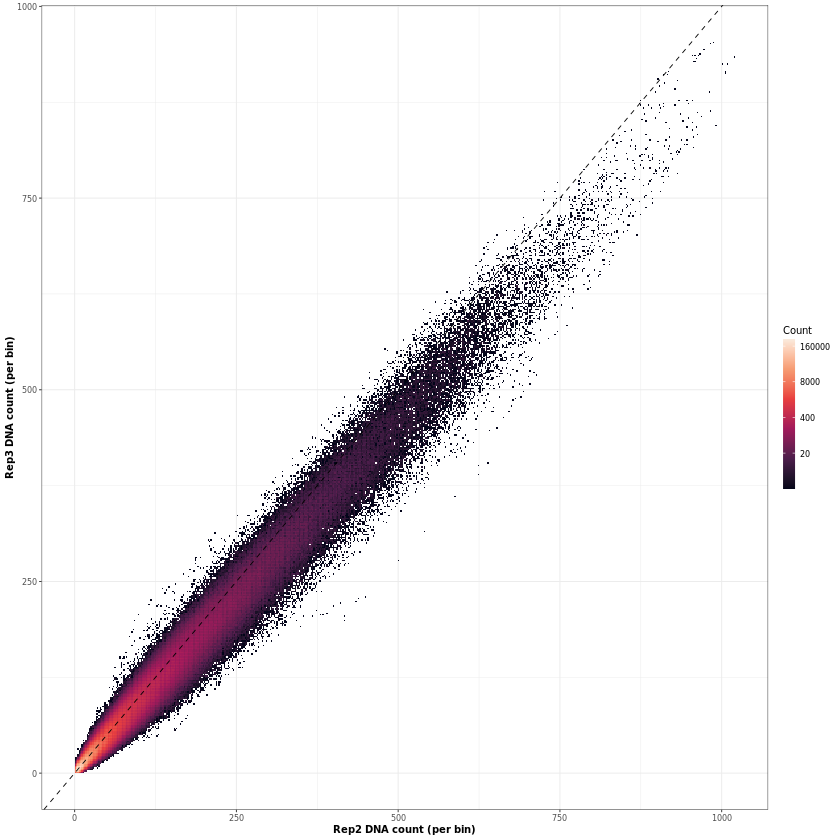

In [8]:
#DNA2 vs DNA3
cor.test(bins_df$DNA2, bins_df$DNA3, method = "spearman")
cor.test(bins_df$DNA2, bins_df$DNA3, method = "pearson")

p <- ggplot(bins_df) +
  geom_bin2d(aes(x=DNA2, y=DNA3), bins = 500) +
  scale_fill_viridis_c(trans = "log", breaks = c(0, 20, 400, 8000, 160000), option = "rocket") +
  geom_abline(mapping=aes(slope=1, intercept=0), colour="black", linetype="dashed", size=0.25) + 
  theme_bw(base_family = "Arial", base_size = 6) + 
  xlab("Rep2 DNA count (per bin)") + 
  ylab("Rep3 DNA count (per bin)") +
  labs(fill = "Count") +
  theme(legend.position = "right", legend.key.height = unit(0.25, units = "in"), 
        legend.key.width = unit(0.1, units = "in"), axis.title = element_text(face = "bold"))

p 

res <- '/data/hodges_lab/ATAC-STARR_B-cells/results/NAR_paper_figures'
ggsave(p, filename = paste0(res, "/unique_corr_D2-D3"), device = cairo_pdf, width = 2, height = 2)